In [12]:
import numpy as np
import os
from data_processor import DataProcessor
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

In [13]:
import os
import pandas as pd

def combine_csvs_from_folder(folder_path):
    # Get the list of all csv files in the folder
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Create an empty list to hold dataframes
    dfs = []

    # Read the first csv file to get the number of columns
    first_file_path = os.path.join(folder_path, csv_files[0])
    first_df = pd.read_csv(first_file_path, encoding='unicode_escape')
    num_columns = len(first_df.columns)
    dfs.append(first_df)

    # Read the rest of the csv files
    for file in csv_files[1:]:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path, encoding='unicode_escape')

        # Check if the number of columns matches the first CSV
        if len(df.columns) != num_columns:
            print(f"Error: {file} has a different number of columns!")
            continue
        dfs.append(df)

    # Concatenate all dataframes into a single dataframe
    combined_df = pd.concat(dfs, ignore_index=True)

    return combined_df

# Usage
folder_path = 'D:\KaiJung Wu\Long_Term_1min_Data\ILst202103250000-202201202359-Operation data_Saltend2GT'
result_df = combine_csvs_from_folder(folder_path)
print(result_df)


                   date  GT2 TURB SPEED  GT2 GEN OUTPUT  GT2 GT GEN OUTPUT  \
0        3/25/2021 0:00           0.015             0.0              0.182   
1        3/25/2021 0:01           0.015             0.0              0.182   
2        3/25/2021 0:02           0.015             0.0              0.182   
3        3/25/2021 0:03           0.015             0.0              0.182   
4        3/25/2021 0:04           0.015             0.0              0.182   
...                 ...             ...             ...                ...   
434875  1/20/2022 23:55           0.015             0.0              0.182   
434876  1/20/2022 23:56           0.015             0.0              0.182   
434877  1/20/2022 23:57           0.015             0.0              0.182   
434878  1/20/2022 23:58           0.015             0.0              0.182   
434879  1/20/2022 23:59           0.015             0.0              0.182   

        GT2 ST GEN OUTPUT  GT2 IGV POS  GT2 COMP ILET AIR TEMP 

In [14]:

print(f'Infromation of Raw Data {result_df.info()}')  
print('----------------------------')
load_df=pd.DataFrame()
load_df=result_df[result_df['GT2 GEN OUTPUT']>20]
print(f'Infromation of Load Operatrion Data {load_df.info()}')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434880 entries, 0 to 434879
Columns: 131 entries, date to GT2 IGV POS DEMAND(IGVCSO)
dtypes: float64(130), object(1)
memory usage: 434.6+ MB
Infromation of Raw Data None
----------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 316511 entries, 6582 to 432360
Columns: 131 entries, date to GT2 IGV POS DEMAND(IGVCSO)
dtypes: float64(130), object(1)
memory usage: 318.8+ MB
Infromation of Load Operatrion Data None


In [15]:
result_df['Timestamps']=pd.to_datetime(result_df['date'], format='%m/%d/%Y %H:%M')


In [ ]:
monthly_counts = result_df.groupby(pd.Grouper(key='Timestamps', freq='M')).apply(
    lambda x: pd.Series({
        'GT2 GEN OUTPUT > 20': (x['GT2 GEN OUTPUT'] > 20).sum(),
        'GT2 GEN OUTPUT <= 20': (x['GT2 GEN OUTPUT'] <= 20).sum()
    })
).reset_index()


# Plot the bar chart
plt.figure(figsize=(14, 7))
bar_width =15

# Create bars for 'GT2 GEN OUTPUT > 20'
bars1 = plt.bar(monthly_counts['Timestamps'], monthly_counts['GT2 GEN OUTPUT > 20'], width=bar_width, color='red', label='GT2 GEN OUTPUT > 20')

# Create bars for 'GT2 GEN OUTPUT <= 20'
bars2 = plt.bar(monthly_counts['Timestamps'], monthly_counts['GT2 GEN OUTPUT <= 20'], width=bar_width, bottom=monthly_counts['GT2 GEN OUTPUT > 20'], color='green', label='GT2 GEN OUTPUT <= 20')

# Adding title and labels
plt.title('Monthly Data Counts')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()

# Adding the amount numbers on the bars
for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    plt.text(bar1.get_x() + bar1.get_width() / 2, height1 / 2, f'{int(height1)}', ha='center', va='bottom', color='black')
    plt.text(bar2.get_x() + bar2.get_width() / 2, height1 + height2 / 2, f'{int(height2)}', ha='center', va='bottom', color='black')

# Show the plot
plt.tight_layout()
plt.show()



In [16]:
load_df['Timestamps']=pd.to_datetime(load_df['date'], format='%m/%d/%Y %H:%M')


C:\Users\CSEUser2\AppData\Local\Temp\ipykernel_71580\2824649492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  load_df['Timestamps']=pd.to_datetime(load_df['date'], format='%m/%d/%Y %H:%M')


In [17]:
# Add new column 'Date' containing only the date part as string
load_df['Date'] = load_df['Timestamps'].dt.strftime('%Y-%m-%d')

C:\Users\CSEUser2\AppData\Local\Temp\ipykernel_71580\2035182960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  load_df['Date'] = load_df['Timestamps'].dt.strftime('%Y-%m-%d')


In [19]:

training_parameters=[
#'date',
'GT2 TURB SPEED',
'GT2 GEN OUTPUT',
'GT2 GT GEN OUTPUT',
'GT2 ST GEN OUTPUT',
'GT2 IGV POS',
'GT2 COMP ILET AIR TEMP',
'GT2 COMP OLET AIR TEMP',
'GT2 GT ROTOR COOL AIR TEMP(R)',
'GT2 GT ROTOR COOL AIR TEMP(L)',
'GT2 GT NO2 ROW DISC CAVITY TEMP(R)',
'GT2 GT NO2 ROW DISC CAVITY TEMP(L)',
'GT2 LO SPLY TEMP',
'GT2 NO1 BRG DRN OIL TEMP',
'GT2 NO2 BRG DRN OIL TEMP',
'GT2 THRUST BRG DRN OIL TEMP',
'GT2 NO1 BRG PAD MTL TEMP-1',
'GT2 NO1 BRG PAD MTL TEMP-2',
'GT2 NO2 BRG PAD MTL TEMP-1',
'GT2 NO2 BRG PAD MTL TEMP-2',
'GT2 THRUST BRG PAD MTL TEMP(GT SIDE)-1',
'GT2 THRUST BRG PAD MTL TEMP(GT SIDE)-2',
'GT2 NO1 BRG ROTOR VIBRATION -X',
'GT2 NO1 BRG ROTOR VIBRATION -Y',
'GT2 NO2 BRG ROTOR VIBRATION -X',
'GT2 NO2 BRG ROTOR VIBRATION -Y',
'GT2 ROTOR POS-1(GT Side)',
'GT2 ROTOR POS-2(GT Side)',
'GT2 ROTOR POS-3(GT Side)',
'GT2 ROTOR ECCENTRICITY',
'GT2 BLADE PATH TEMP AVERAGE',
'GT2 EXH GAS TEMP AVERAGE',
'GT2 NO1BLADE PATH TEMP',
'GT2 NO2BLADE PATH TEMP',
'GT2 MAIN FLOW CV POS',
'GT2 MAIN PRS CV A POS',
'GT2 MAIN PRS CV B POS',
'GT2 PILOT FLOW CV POS',
'GT2 PILOT PRS CV POS',
'GT2 FUEL GAS MAIN FLOW VLV DIFF PRS',
'GT2 FUEL GAS PILOT FLOW VLV DIFF PRS',
'GT2 CSO',
'GT2 PLCSO',
'GT2 MCSO',
'GT2 GVCSO',
'GT2 LDCSO',
'GT2 EXCSO',
'GT2 EXH GAS TEMP REFERENCE(EXREF)',
'GT2 BPCSO',
'GT2 BLADE PATH TEMP REFERENCE(BPREF)',
'GT2 COMB SHELL PRS',
'GT2 COMB BYPASS VLV POS DEMAND(BYCSO)',
'GT2 COMB BYPASS VLV POS',
'GT2 IGV POS DEMAND(IGVCSO)',
#'Timestamps'
#'Date'
]



In [ ]:
load_df

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the parameters for the directory
folder_name = 'BOx-Plot-Bin'
folder_dir = 'D:\\KaiJung Wu\\Code\\Code\\Code\\Code\\Box-Plot'
plot_path = os.path.join(folder_dir, folder_name)
os.makedirs(plot_path, exist_ok=True)

# Assuming load_df is your DataFrame and 'Timestamps' is the datetime column
# Define the bins based on intervals of 50 for GT2 GEN OUTPUT
bins = np.arange(0, load_df['GT2 GEN OUTPUT'].max() + 50, 50)
labels = [f'{i}-{i+50}' for i in bins[:-1]]
print(labels)

# Define a color palette
colors = sns.color_palette("brg", len(load_df.groupby(pd.Grouper(key='Timestamps', freq='ME'))))  # or any other palette

# Parameters you want to plot

# Create a plot for each bin group
for i in range(len(bins) - 1):
    bin_name = f'{labels[i]}'
    store_path = os.path.join(plot_path, bin_name)
    os.makedirs(store_path, exist_ok=True)  # Ensure directory exists
    
    for para in training_parameters:
        data_to_plot = []
        month_labels = []

        for month_label, month_data in load_df.groupby(pd.Grouper(key='Timestamps', freq='ME')):
            month_string = month_label.strftime('%Y-%m')
            data_to_plot.append(month_data[para].values.flatten())
            month_labels.append(month_string)

        # Plot boxplots for each month on the same plot
        plt.figure(figsize=(14, 7))
        plt.boxplot(data_to_plot, patch_artist=True)
        plt.title(f'Boxplot of {para} by Month Bin {bin_name}')
        plt.xlabel('Month')
        plt.ylabel('Value')
        plt.xticks(ticks=range(1, len(month_labels) + 1), labels=month_labels, rotation=45)
        plt.tight_layout()  # Adjust layout to prevent clipping of labels
        plt.savefig(os.path.join(store_path, f"Boxplot of {para} by Month Bin {bin_name}.png"))
        plt.close()
        #plt.show()
        print(f'{bin_name} for {para} finish')
print('---------------plt finish----------------------')


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Set the parameters for the directory
folder_name = 'Confusion-Matrix-Bin'
folder_dir = 'D:\\KaiJung Wu\\Code\\Code\\Code\\Code\\Confusion-Matrix'
plot_path = os.path.join(folder_dir, folder_name)
os.makedirs(plot_path, exist_ok=True)

# Assuming load_df and training_parameters are defined somewhere above in your script
# Define the target and parameters
target_column = 'GT2 NO1 BRG ROTOR VIBRATION -X'

# Define the bins based on intervals of 50 for GT2 GEN OUTPUT
bins = np.arange(0, load_df['GT2 GEN OUTPUT'].max() + 50, 50)
labels = [f'{i}-{i+50}' for i in bins[:-1]]

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Bin', 'Month', 'Parameter', 'Confusion'])


# Compute confusion matrices for each parameter by month and store in the DataFrame
for i in range(len(bins) - 1):
    bin_name = f'{labels[i]}'
    for para in training_parameters:
        for month, month_data in load_df.groupby(pd.Grouper(key='Timestamps', freq='M')):
            # Filter the data based on the bin range
            bin_data = month_data[(month_data['GT2 GEN OUTPUT'] >= bins[i]) & (month_data['GT2 GEN OUTPUT'] < bins[i + 1])]
            
            if bin_data.shape[0] > 1:
                # Binarize the target and parameter for the confusion matrix
                target_binarized = pd.cut(bin_data[target_column], bins=2, labels=[0, 1])
                param_binarized = pd.cut(bin_data[para], bins=2, labels=[0, 1])
                conf_matrix = confusion_matrix(target_binarized, param_binarized)
                
                # Create a temporary DataFrame for the current result
                temp_df = pd.DataFrame({
                    'Bin': [bin_name],
                    'Month': [month.strftime('%Y-%m')],
                    'Parameter': [para],
                    'Confusion': [conf_matrix[1, 1]]  # For simplicity, using the TP rate as an example
                })
                
                # Concatenate the temporary DataFrame to the results DataFrame
                results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Ensure 'Confusion' column is numeric
results_df['Confusion'] = pd.to_numeric(results_df['Confusion'])

# Now, let's plot the results for each bin separately
for bin_label in labels:
    bin_df = results_df[results_df['Bin'] == bin_label]
    pivot_df = bin_df.pivot(index='Month', columns='Parameter', values='Confusion')

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_df, annot=True, fmt='.1f', cmap='viridis', cbar_kws={'label': 'Confusion Rate'})
    plt.title(f'Confusion Rates by Month and Parameter for {bin_label}')
    plt.xlabel('Parameter')
    plt.ylabel('Month')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()

    # Save the plot
    plot_filename = os.path.join(plot_path, f'Confusion_Matrix_{bin_label}.png')
    #plt.savefig(plot_filename)
    plt.show()
    plt.close()

print('Confusion matrices computation and plotting completed.')


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the parameters for the directory
folder_name = 'Confusion-Matrix-Bin'
folder_dir = 'D:\\KaiJung Wu\\Code\\Code\\Code\\Code\\Confusion-Matrix'
plot_path = os.path.join(folder_dir, folder_name)
os.makedirs(plot_path, exist_ok=True)

# Define the target and parameters
target_columns= ['GT2 NO1 BRG ROTOR VIBRATION -X',
'GT2 NO1 BRG ROTOR VIBRATION -Y',
'GT2 NO2 BRG ROTOR VIBRATION -X',
'GT2 NO2 BRG ROTOR VIBRATION -Y']

# Assuming load_df and training_parameters are defined somewhere above in your script

# Define the bins based on intervals of 50 for GT2 GEN OUTPUT
bins = np.arange(0, load_df['GT2 GEN OUTPUT'].max() + 50, 50)
labels = [f'{i}-{i+50}' for i in bins[:-1]]
load_df['Group'] = pd.cut(load_df['GT2 GEN OUTPUT'], bins=bins, labels=labels, include_lowest=True)
for target_column in target_columns:
    for i in range(len(bins) - 1):
        bin_name = f'{labels[i]}'
    # Filter data for the specified bin range
        filter_data = load_df[load_df['Group'] == bin_name][training_parameters + [target_column, 'Timestamps']]
        # Initialize an empty dictionary to store the results
        correlation_dict = {}

        # Group by month and calculate correlation
        for month, month_data in filter_data.groupby(pd.Grouper(key='Timestamps', freq='ME')):
            if month_data.shape[0] > 1:
                correlation = month_data.corr()[target_column]
                correlation = correlation.drop(target_column)
                correlation_dict[month.strftime('%Y-%m')] = correlation.iloc[:,0]
        # Convert the dictionary to a DataFrame
        correlation_df = pd.DataFrame.from_dict(correlation_dict)
        csv_filename = os.path.join(plot_path, f'{target_column}_Correlation_{bin_name}.csv')
        correlation_df.to_csv(csv_filename)
        
        # #print(correlation_df)
        # # Plot the heatmap
        # plt.figure(figsize=(20, 15))  # Increase the figure size
        # heatmap = sns.heatmap(correlation_df, annot=False, fmt='.2f', cmap='viridis', cbar_kws={'label': 'Correlation Index'}, linewidths=0.5, linecolor='black', annot_kws={"size": 15})

        # # Ensure grid lines are visible
        # heatmap.hlines(range(len(correlation_df.index)), *heatmap.get_xlim(), color='black', linewidth=0.5)
        # heatmap.vlines(range(len(correlation_df.columns)), *heatmap.get_ylim(), color='black', linewidth=0.5)

        # plt.title(f'Correlation Index of {target_column} by Month in GEN OUTPUT {bin_name}')
        # plt.xlabel('Month')
        # plt.ylabel('Parameter')
        # plt.xticks(rotation=0)  # Rotate and align month labels
        # plt.yticks(rotation=0)
        # plt.tight_layout()

        # # Save the plot
        # plot_filename = os.path.join(plot_path, f'{target_column} Correlation_Heatmap {bin_name}.png')
        # plt.savefig(plot_filename, bbox_inches='tight')  # Use bbox_inches to avoid clipping
        # #plt.show()
        # plt.close()

        # print('Correlation computation and plotting completed.')



C:\Users\CSEUser2\AppData\Local\Temp\ipykernel_89440\3426122569.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  load_df['Group'] = pd.cut(load_df['GT2 GEN OUTPUT'], bins=bins, labels=labels, include_lowest=True)


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming load_df is your DataFrame and 'Timestamps' is the datetime column
# Define the bins based on intervals of 50 for GT2 GEN OUTPUT
bins = np.arange(0, load_df['GT2 GEN OUTPUT'].max() + 50, 50)
labels = [f'{i}-{i+50}' for i in bins[:-1]]
print(labels)

# Define a color palette
colors = sns.color_palette("brg", len(load_df.groupby(pd.Grouper(key='Timestamps', freq='ME'))))

# Parameters you want to plot
training_parameters = ['GT2 NO1 BRG ROTOR VIBRATION -X', 'GT2 COMP INLET AIR TEMP', 'GT2 GEN OUTPUT']



# Create a 'Group' column based on the bins
load_df['Group'] = pd.cut(load_df['GT2 GEN OUTPUT'], bins=bins, labels=labels, include_lowest=True)

# Statistical indices to plot
stats_to_plot = ['mean', '50%', 'std', 'min', 'max']  # '50%' is the median in describe()

# Create a plot for each bin group and each statistical index
for i in range(len(bins) - 1):
    for para_idx, para in enumerate(training_parameters):
        stats_dict = {stat: [] for stat in stats_to_plot}
        months = []

        for idx, (month_label, month_data) in enumerate(load_df.groupby(pd.Grouper(key='Timestamps', freq='ME'))):
            month_data = month_data.copy()
            month_data.loc[:, 'Group'] = pd.cut(month_data['GT2 GEN OUTPUT'], bins=bins, labels=labels, include_lowest=True)
            group_data = month_data[month_data['Group'] == labels[i]]
            
            if not group_data.empty:
                desc = group_data[para].describe()
                for stat in stats_to_plot:
                    stats_dict[stat].append(desc[stat])
                months.append(month_label.strftime("%Y-%m"))

        for stat in stats_to_plot:
            fig, ax = plt.subplots(figsize=(20, 14))
            ax.plot(months, stats_dict[stat], marker='o', label=stat, color=colors[0])

            ax.set_title(f'{stat.capitalize()} of {para} for Bin {labels[i]}')
            ax.set_ylabel(f'{stat.capitalize()}')
            ax.set_xlabel('Month')
            ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

            plt.xticks(rotation=45)
            # Save the figure if needed
            # plt.savefig(f'{stat}_of_{para}_bin_{labels[i]}.png')

            plt.show()


In [ ]:

# Define the bins based on intervals of 50 for GT2 GEN OUTPUT
bins = np.arange(0, load_df['GT2 GEN OUTPUT'].max() + 50, 50)
labels = [f'{i}-{i+50}' for i in bins[:-1]]

# Set the parameters to plot
parameter_x = 'GT2 GEN OUTPUT'
parameter_y = 'GT2 NO1 BRG ROTOR VIBRATION -X'

# Define a color palette
colors = sns.color_palette("hsv", len(load_df.groupby(pd.Grouper(key='Timestamps', freq='M'))))

# Create a plot for each bin group
for i in range(len(bins) - 1):
    plt.figure(figsize=(12, 8))
    plt.title(f'Scatter Plot of {parameter_x} vs {parameter_y} for Group: {labels[i]}')
    plt.xlabel(parameter_x)
    plt.ylabel(parameter_y)
    #plt.axhline(y=45, color='red', linestyle='--', linewidth=2, label='Vibration = 20')

    for idx, (month_label, month_data) in enumerate(load_df.groupby(pd.Grouper(key='Timestamps', freq='M'))):
        # Create a new column 'Group' based on the bins
        month_data['Group'] = pd.cut(month_data['GT2 GEN OUTPUT'], bins=bins, labels=labels, include_lowest=True)

        group_data = month_data[month_data['Group'] == labels[i]]
        plt.scatter(group_data[parameter_x], group_data[parameter_y], alpha=0.5, label=f'{month_label.strftime("%Y-%m")}', color=colors[idx])

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    # plt.savefig(os.path.join(plot_path, f"Scatter Plot of {parameter_x} vs {parameter_y} for Group {labels[i]}.png"))
    plt.show()
    


In [ ]:
labels

['0.0-50.0',
 '50.0-100.0',
 '100.0-150.0',
 '150.0-200.0',
 '200.0-250.0',
 '250.0-300.0',
 '300.0-350.0',
 '350.0-400.0',
 '400.0-450.0']

In [ ]:
from bokeh.plotting import figure, show, output_notebook, save
from bokeh.models import ColumnDataSource,HoverTool
from bokeh.io.export import export_png
from bokeh.io import export_svgs
from bokeh.layouts import column
from bokeh.resources import INLINE
from bokeh.embed import file_html

output_notebook()

bins = np.arange(0, load_df['GT2 GEN OUTPUT'].max() + 50, 50)
labels = [f'{i}-{i+50}' for i in bins[:-1]]
load_df = load_df.copy()
load_df.loc[:, 'Group'] = pd.cut(load_df['GT2 GEN OUTPUT'], bins=bins, labels=labels, include_lowest=True)
data=load_df[load_df['Group']=='250.0-300.0']
df = pd.DataFrame({
    'Timestamp': data['Timestamps'],
    'Original': data['GT2 GEN OUTPUT'],
    #'Reconstructed': reversed_reconstructed
})

# Create a ColumnDataSource
source = ColumnDataSource(df)

# Create the plot
p = figure(x_axis_type="datetime", title="Original and Reconstructed Data", x_axis_label="Timestamp", y_axis_label="GT2 GEN OUTPUT'", height=1000, width=1800)

# Plot original data
p.line(x='Timestamp', y='Original', source=source, legend_label="Original Data", line_color="blue")

# Plot reconstructed data
#p.line(x='Timestamp', y='Reconstructed', source=source, legend_label="Reconstructed Data", line_color="red", line_dash="dashed")



# Add tooltips
hover = HoverTool()
hover.tooltips = [
    ("Timestamp", "@Timestamp{%F %T}"),
    ("Original", "@Original"),
    #("Reconstructed", "@Reconstructed")
]
hover.formatters = {'@Timestamp': 'datetime'}
p.add_tools(hover)

p.legend.location = "top_left"

# Save the plot as an HTML file
save(p, filename="TEST.html", title="Original and Reconstructed Data")



Loading BokehJS ...

C:\Users\CSEUser2\AppData\Local\Temp\ipykernel_74116\2550162440.py:49: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  save(p, filename="TEST.html", title="Original and Reconstructed Data")


'd:\\KaiJung Wu\\Code\\Code\\Code\\Code\\TEST.html'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Enable interactive mode
%matplotlib notebook

# Define the bins based on intervals of 50 for GT2 GEN OUTPUT
bins = np.arange(0, load_df['GT2 GEN OUTPUT'].max() + 50, 50)
labels = [f'{i}-{i+50}' for i in bins[:-1]]

# Set the parameters to plot
parameter_x = 'GT2 GEN OUTPUT'
parameter_y = 'GT2 NO1 BRG ROTOR VIBRATION -X'
parameter_z = 'GT2 COMP ILET AIR TEMP'

# Define a color palette
colors = sns.color_palette("hsv", len(load_df.groupby(pd.Grouper(key='Timestamps', freq='M'))))

# Create a plot for each bin group
for i in range(len(bins) - 1):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(f'Scatter Plot of {parameter_x} vs {parameter_y} for Group: {labels[i]}')
    ax.set_xlabel(parameter_x)
    ax.set_ylabel(parameter_y)
    ax.set_zlabel(parameter_z)

    for idx, (month_label, month_data) in enumerate(load_df.groupby(pd.Grouper(key='Timestamps', freq='M'))):
        # Create a new column 'Group' based on the bins
        month_data['Group'] = pd.cut(month_data['GT2 GEN OUTPUT'], bins=bins, labels=labels, include_lowest=True)

        group_data = month_data[month_data['Group'] == labels[i]]
        ax.scatter(group_data[parameter_x], group_data[parameter_y], group_data[parameter_z], alpha=0.5, label=f'{month_label.strftime("%Y-%m")}', color=colors[idx])

    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Save the figure
    fig.savefig(f'Scatter_Plot_{labels[i]}.png')
    
    plt.show()


In [ ]:
import nbformat
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Define the bins based on intervals of 50 for GT2 GEN OUTPUT
bins = np.arange(0, load_df['GT2 GEN OUTPUT'].max() + 50, 50)
labels = [f'{i}-{i+50}' for i in bins[:-1]]

parameter_x = 'GT2 GEN OUTPUT'
parameter_y = 'GT2 NO1 BRG ROTOR VIBRATION -X'
parameter_z = 'GT2 COMP ILET AIR TEMP'

# Create a plot for each bin group
for i in range(len(bins) - 1):
    fig = go.Figure()
    fig.update_layout(title=f'Scatter Plot of {parameter_x} vs {parameter_y} for Group: {labels[i]}',
                      scene=dict(xaxis_title=parameter_x,
                                 yaxis_title=parameter_y,
                                 zaxis_title=parameter_z))

    for idx, (month_label, month_data) in enumerate(load_df.groupby(pd.Grouper(key='Timestamps', freq='ME'))):
        # Create a new column 'Group' based on the bins
        month_data = month_data.copy()
        month_data.loc[:, 'Group'] = pd.cut(month_data['GT2 GEN OUTPUT'], bins=bins, labels=labels, include_lowest=True)

        group_data = month_data[month_data['Group'] == labels[i]]
        fig.add_trace(go.Scatter3d(
            x=group_data[parameter_x],
            y=group_data[parameter_y],
            z=group_data[parameter_z],
            mode='markers',
            marker=dict(size=5, opacity=0.5),
            name=f'{month_label.strftime("%Y-%m")}'
        ))

    # Save the figure as an HTML file
    fig.write_html(f'Scatter_Plot_{labels[i]}.html')

    fig.show()


In [ ]:
import nbformat
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import seaborn as sns

# Assuming load_df is already defined and contains the necessary data

# Define the bins based on intervals of 50 for GT2 GEN OUTPUT
bins = np.arange(0, load_df['GT2 GEN OUTPUT'].max() + 50, 50)
labels = [f'{i}-{i+50}' for i in bins[:-1]]

parameter_x = 'GT2 GEN OUTPUT'
parameter_z = 'GT2 COMP ILET AIR TEMP'

# Create a color palette
colors = sns.color_palette("brg", len(load_df.groupby(pd.Grouper(key='Timestamps', freq='M'))))#RdYlGn

# Convert colors to a format Plotly understands (hex)
plotly_colors = [f'rgba({int(r*255)}, {int(g*255)}, {int(b*255)}, 1)' for r, g, b in colors]

# Create a plot for each bin group
for i in range(len(bins) - 1):
    fig = go.Figure()
    fig.update_layout(title=f'Scatter Plot of {parameter_x} vs {parameter_y} for Group: {labels[i]}',
                      scene=dict(xaxis_title=parameter_x,
                                 yaxis_title=parameter_y))

    for idx, (month_label, month_data) in enumerate(load_df.groupby(pd.Grouper(key='Timestamps', freq='M'))):
        # Create a new column 'Group' based on the bins
        month_data = month_data.copy()
        month_data.loc[:, 'Group'] = pd.cut(month_data['GT2 GEN OUTPUT'], bins=bins, labels=labels, include_lowest=True)

        group_data = month_data[month_data['Group'] == labels[i]]

        fig.add_trace(go.Scatter3d(
            x=group_data[parameter_x],
            y=group_data[parameter_y],
            z=group_data[parameter_z],
            mode='markers',
            marker=dict(size=5, opacity=0.5, color=plotly_colors[idx]),
            name=f'{month_label.strftime("%Y-%m")}'
        ))

    # Save the figure as an HTML file
    fig.write_html(f'Scatter_Plot_{labels[i]}.html')

    fig.show()


In [ ]:
training_parameters

In [ ]:
load_df.columns

In [ ]:

# Set the parameters to plot
parameter_y = 'GT2 NO1 BRG ROTOR VIBRATION -X'

# Create a color palette with a gradient
num_months = len(load_df.groupby(pd.Grouper(key='Timestamps', freq='M')))
colors = sns.color_palette("viridis", num_months)

# Create a plot for each bin group
for i in range(len(bins) - 1):
    plt.figure(figsize=(12, 8))
    plt.title(f'Density Plot of {parameter_y} for Group: {labels[i]}')
    plt.xlabel(parameter_y)
    plt.ylabel('Density')

    # DataFrame to store the group data
    group_data_df = pd.DataFrame()

    for idx, (month_label, month_data) in enumerate(load_df.groupby(pd.Grouper(key='Timestamps', freq='M'))):
        # Create a new column 'Group' based on the bins
        month_data['Group'] = pd.cut(month_data['GT2 GEN OUTPUT'], bins=bins, labels=labels, include_lowest=True)
        
        group_data = month_data[month_data['Group'] == labels[i]]
        group_data['Month'] = month_label.strftime("%Y-%m")
        
        group_data_df = pd.concat([group_data_df, group_data], axis=0)
    
    # Create the density plot
    for idx, month_label in enumerate(group_data_df['Month'].unique()):
        sns.kdeplot(group_data_df[group_data_df['Month'] == month_label][parameter_y], label=month_label, color=colors[idx])

    plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    # plt.savefig(os.path.join(plot_path, f"Density Plot of {parameter_y} for Group {labels[i]}.png"))
    plt.show()


In [ ]:

plt.figure(figsize=(14, 7))
date_counts = load_df.groupby(pd.Grouper(key='Timestamps', freq='M')).size()

# Plot the data as a bar plot
ax = date_counts.plot(kind='box')
ax.set_title('Number of Samples per Date')
ax.set_xlabel('Month-Year')
ax.set_ylabel('Amount')
ax.set_xticklabels([d.strftime('%Y-%m') for d in date_counts.index])
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_notebook,save
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20

output_notebook()

# Sample load_df data for illustration
# Assuming load_df is a DataFrame with columns including 'Timestamps', 'GT2 NO1 BRG ROTOR VIBRATION -X', etc.

# Set the parameters to plot
parameters = ['GT2 NO1 BRG ROTOR VIBRATION -X', 'GT2 NO1 BRG ROTOR VIBRATION -Y', 'GT2 NO2 BRG ROTOR VIBRATION -X', 'GT2 NO2 BRG ROTOR VIBRATION -Y']

for para in parameters:
    # Prepare data for plotting
    data_to_plot = []
    data_to_plot_y = []
    month_labels = []

    for month_label, month_data in load_df.groupby(pd.Grouper(key='Timestamps', freq='M')):
        data_to_plot.extend(month_data['GT2 GEN OUTPUT'].values.flatten())
        data_to_plot_y.extend(month_data[para].values.flatten())
        month_labels.extend([month_label.strftime('%Y-%m')] * len(month_data))

    # Create DataFrame for Bokeh plot
    plot_df = pd.DataFrame({
        'Month': month_labels,
        'GT2 GEN OUTPUT': data_to_plot,
        'Vibration': data_to_plot_y
    })

    # Prepare data for Bokeh
    source = ColumnDataSource(plot_df)

    # Define colors for each month
    unique_months = sorted(plot_df['Month'].unique())
    colors = Category20[len(unique_months)]

    # Create the Bokeh plot
    p = figure(title=f'Scatter Plot of {para} by Month', height=600, width=1000)
    p.scatter(x='GT2 GEN OUTPUT', y='Vibration', source=source, size=8, color=factor_cmap('Month', palette=colors, factors=unique_months), legend_field='Month')

    # Add tooltips
    hover = HoverTool()
    hover.tooltips = [
        ("Month", "@Month"),
        ("GT2 GEN OUTPUT", "@{GT2 GEN OUTPUT}"),
        ("Vibration", "@Vibration")
    ]
    p.add_tools(hover)

    p.legend.location = "top_left"
    p.xaxis.axis_label = "GT2 GEN OUTPUT"
    p.yaxis.axis_label = para
    save(p, filename=f"{para} .html", title=f"{para}")


In [ ]:
# Set the parameter to plot
folder_name='Box-Plot'
folder_dir='D:\KaiJung Wu\Code\Code\Code\Code'
plot_path=os.path.join(folder_dir,folder_name)
os.makedirs(plot_path,exist_ok =True)
parameters = ['GT2 NO1 BRG ROTOR VIBRATION -X', 'GT2 NO1 BRG ROTOR VIBRATION -Y', 'GT2 NO2 BRG ROTOR VIBRATION -X', 'GT2 NO2 BRG ROTOR VIBRATION -Y']
parameter = ['GT2 GEN OUTPUT']
for para in parameters:
    data_to_plot = []
    date_labels=[]
    month_labels = []

    for month_label, month_data in load_df.groupby(pd.Grouper(key='Timestamps', freq='M')):
     
        month_string=month_label.strftime('%Y-%m')
        #for date_label,date_data in month_data.groupby(pd.Grouper(key='Timestamps', freq='D')):

            # data_to_plot_y=[]

        data_to_plot.append(month_data[para].values.flatten())
    #data_to_plot_y.append(month_data['GT2 GEN OUTPUT'].values.flatten())
        month_labels.append(month_label.strftime('%Y-%m'))

        # Plot boxplots for each month on the same plot
plt.figure(figsize=(14, 7))
plt.boxplot(data_to_plot)
#plt.scatter(data_to_plot,data_to_plot_y)
plt.title(f'Boxplot of {para} by Month')
plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks(ticks=range(1, len(month_labels) + 1), labels=month_labels, rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig(os.path.join(plot_path,f"Boxplot of {para} by Month.png"))
plt.show()



In [ ]:
vibration_parameters=[
# 'date',
# 'GT2 TURB SPEED',
# 'GT2 GEN OUTPUT',
# 'GT2 GT GEN OUTPUT',
# 'GT2 ST GEN OUTPUT',
# 'GT2 IGV POS',
# 'GT2 COMP ILET AIR TEMP',
# 'GT2 COMP OLET AIR TEMP',
# 'GT2 GT ROTOR COOL AIR TEMP(R)',
# 'GT2 GT ROTOR COOL AIR TEMP(L)',
# 'GT2 GT NO2 ROW DISC CAVITY TEMP(R)',
# 'GT2 GT NO2 ROW DISC CAVITY TEMP(L)',
# 'GT2 LO SPLY TEMP',
# 'GT2 NO1 BRG DRN OIL TEMP',
# 'GT2 NO2 BRG DRN OIL TEMP',
# 'GT2 THRUST BRG DRN OIL TEMP',
# 'GT2 NO1 BRG PAD MTL TEMP-1',
# 'GT2 NO1 BRG PAD MTL TEMP-2',
# 'GT2 NO2 BRG PAD MTL TEMP-1',
# 'GT2 NO2 BRG PAD MTL TEMP-2',
# 'GT2 THRUST BRG PAD MTL TEMP(GT SIDE)-1',
# 'GT2 THRUST BRG PAD MTL TEMP(GT SIDE)-2',
'GT2 NO1 BRG ROTOR VIBRATION -X',
'GT2 NO1 BRG ROTOR VIBRATION -Y',
'GT2 NO2 BRG ROTOR VIBRATION -X',
'GT2 NO2 BRG ROTOR VIBRATION -Y',
# 'GT2 ROTOR POS-1(GT Side)',
# 'GT2 ROTOR POS-2(GT Side)',
# 'GT2 ROTOR POS-3(GT Side)',
# 'GT2 ROTOR ECCENTRICITY',
# 'GT2 BLADE PATH TEMP AVERAGE',
# 'GT2 EXH GAS TEMP AVERAGE',
# 'GT2 NO1BLADE PATH TEMP',
# 'GT2 NO2BLADE PATH TEMP',
# 'GT2 MAIN FLOW CV POS',
# 'GT2 MAIN PRS CV A POS',
# 'GT2 MAIN PRS CV B POS',
# 'GT2 PILOT FLOW CV POS',
# 'GT2 PILOT PRS CV POS',
# 'GT2 FUEL GAS MAIN FLOW VLV DIFF PRS',
# 'GT2 FUEL GAS PILOT FLOW VLV DIFF PRS',
# 'GT2 CSO',
# 'GT2 PLCSO',
# 'GT2 MCSO',
# 'GT2 GVCSO',
# 'GT2 LDCSO',
# 'GT2 EXCSO',
# 'GT2 EXH GAS TEMP REFERENCE(EXREF)',
# 'GT2 BPCSO',
# 'GT2 BLADE PATH TEMP REFERENCE(BPREF)',
# 'GT2 COMB SHELL PRS',
# 'GT2 COMB BYPASS VLV POS DEMAND(BYCSO)',
# 'GT2 COMB BYPASS VLV POS',
# 'GT2 IGV POS DEMAND(IGVCSO)',
'Timestamps'
# 'Date'
]


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

folder_name = 'Density-Plot'
folder_dir = 'D:\\KaiJung Wu\\Code\\Code\\Code\\Code'
plot_path = os.path.join(folder_dir, folder_name)
os.makedirs(plot_path, exist_ok=True)

# Set the parameters to plot
parameters = [training_parameters]

# Create a density plot for each parameter
for para in parameters:
    plt.figure(figsize=(10, 6))
    
    # Plot density plot using seaborn
    sns.kdeplot(load_df[para].dropna(), shade=True)
    plt.title(f'Density Plot of {para}')
    plt.xlabel(para)
    plt.ylabel('Density')

    plt.axvline(x=45, color='red', linestyle='--', linewidth=2, label='Vibration = 20')
    plt.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent clipping of labels and title
   # plt.savefig(os.path.join(plot_path, f"Density Plot of {para}.png"))
    plt.show()


In [ ]:
folder_name='Scatter-Plot'

folder_dir='D:\KaiJung Wu\Code\Code\Code\Code'
plot_path=os.path.join(folder_dir,folder_name)
os.makedirs(plot_path,exist_ok =True)

# Set the parameters to plot
parameters = ['GT2 NO2 BRG ROTOR VIBRATION -Y']#, 'GT2 NO1 BRG ROTOR VIBRATION -Y', 'GT2 NO2 BRG ROTOR VIBRATION -X', 'GT2 NO2 BRG ROTOR VIBRATION -Y']

# Create a plot for each parameter
for para in parameters:
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15), sharex=True, sharey=True)
    axes = axes.flatten()
    month_labels = []

    for i, (month_label, month_data) in enumerate(load_df.groupby(pd.Grouper(key='Timestamps', freq='M'))):
        ax = axes[i]
        month_labels.append(month_label.strftime('%Y-%m'))

        data_to_plot = month_data['GT2 GEN OUTPUT'].values.flatten()
        data_to_plot_y = month_data[para].values.flatten()

        ax.scatter(data_to_plot, data_to_plot_y)
        ax.axhline(y=45, color='red', linestyle='--', linewidth=2, label='Vibration = 20')

        ax.set_title(f'{month_label.strftime("%Y-%m")}')
        ax.set_xlabel('GT2 GEN OUTPUT')
        ax.set_ylabel(para)

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f'Scatter Plot of {para} by Month', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent clipping of labels and title
    plt.savefig(os.path.join(plot_path,f"Scatter Plot of {para} by Month.png"))
    plt.show()


In [ ]:

# Split data into training, validation, and testing sets
training_data = load_df[(load_df['Timestamps'] >= '2021-03-01') & (load_df['Timestamps'] <= '2021-07-31')].sort_values(by='Timestamps')
validation_data = load_df[(load_df['Timestamps'] >= '2021-08-01') & (load_df['Timestamps'] <= '2021-09-30')]
testing_data = load_df[(load_df['Timestamps'] >= '2021-10-01') & (load_df['Timestamps'] <= '2022-01-31')].sort_values(by='Timestamps')


# Display the splits
print("Training Data:")
print(training_data['GT2 GEN OUTPUT'].shape)
print("\nValidation Data:")
print(validation_data['GT2 GEN OUTPUT'].shape)
print("\nTesting Data:")
print(testing_data['GT2 GEN OUTPUT'].shape)



Training Data:
(160274,)

Validation Data:
(71881,)

Testing Data:
(82917,)


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

folder_name = 'Density-Plot'
folder_dir = 'D:\\KaiJung Wu\\Code\\Code\\Code\\Code'
plot_path = os.path.join(folder_dir, folder_name)
os.makedirs(plot_path, exist_ok=True)



# Create a density plot for each parameter
for para in training_parameters:
    plt.figure(figsize=(10, 6))
    
    # Plot density plots using seaborn for training, validation, and testing data
    sns.kdeplot(training_data[para].dropna(), fill=True, label='Training',color='red')
    sns.kdeplot(validation_data[para].dropna(), fill=True, label='Validation', color='green')
    sns.kdeplot(testing_data[para].dropna(), fill=True, label='Testing', color='blue')
    
    plt.title(f'Density Plot of {para}')
    plt.xlabel(para)
    plt.ylabel('Density')

    plt.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent clipping of labels and title
    #plt.savefig(os.path.join(plot_path, f"Density Plot of {para}.png"))
    plt.show()


In [ ]:
# Normalize and save the mean and std we get,
# for normalizing test data.
training_mean = training_data['GT2 GEN OUTPUT'].mean()
training_std = training_data['GT2 GEN OUTPUT'].std()
df_training_value = (training_data['GT2 GEN OUTPUT']
                     - training_mean) / training_std
df_val_value = (validation_data['GT2 GEN OUTPUT']
                     - training_mean) / training_std
df_test_value = (testing_data['GT2 GEN OUTPUT']
                     - training_mean) / training_std
print("Number of training samples:", len(df_training_value))
print("Number of training samples:", len(df_val_value))
print("Number of training samples:", len(df_test_value))


Number of training samples: 160274
Number of training samples: 71881
Number of training samples: 82917


In [ ]:
training_data[vibration_parameters].iloc[:,:-1]

,GT2 NO1 BRG ROTOR VIBRATION -X,GT2 NO1 BRG ROTOR VIBRATION -Y,GT2 NO2 BRG ROTOR VIBRATION -X,GT2 NO2 BRG ROTOR VIBRATION -Y
6582,23.199,24.326,29.503,36.716
6583,21.379,21.684,28.828,34.985
6584,19.560,19.315,28.924,34.348
6585,21.106,20.864,29.213,34.074
6586,19.742,19.224,29.213,36.261
...,...,...,...,...
184316,10.917,11.844,38.855,42.821
184317,11.645,12.026,38.662,43.914
184318,10.735,11.935,37.794,44.370
184319,11.645,11.844,38.469,44.005


In [ ]:
# Normalize and save the mean and std we get,
# for normalizing test data.
training_mean = training_data[vibration_parameters].iloc[:,:-1].mean()
training_std = training_data[vibration_parameters].iloc[:,:-1].std()
df_training_value = (training_data[vibration_parameters].iloc[:,:-1]- training_mean) / training_std
df_val_value = (validation_data[vibration_parameters].iloc[:,:-1]- training_mean) / training_std
df_test_value = (testing_data[vibration_parameters].iloc[:,:-1]- training_mean) / training_std

In [ ]:
training_df=pd.concat([training_data['Timestamps'],df_training_value],axis=1)
validation_df=pd.concat([validation_data['Timestamps'],df_val_value],axis=1)
testing_df=pd.concat([testing_data['Timestamps'],df_test_value],axis=1)

In [ ]:
training_df

,Timestamps,GT2 NO1 BRG ROTOR VIBRATION -X,GT2 NO1 BRG ROTOR VIBRATION -Y,GT2 NO2 BRG ROTOR VIBRATION -X,GT2 NO2 BRG ROTOR VIBRATION -Y
6582,2021-03-29 13:42:00,4.775777,4.680977,-2.238590,-1.780140
6583,2021-03-29 13:43:00,3.777295,3.399694,-2.357508,-2.041400
6584,2021-03-29 13:44:00,2.779361,2.250807,-2.340595,-2.137543
6585,2021-03-29 13:45:00,3.627522,3.002021,-2.289680,-2.178897
6586,2021-03-29 13:46:00,2.879209,2.206675,-2.289680,-1.848813
...,...,...,...,...,...
184316,2021-07-30 23:56:00,-1.962333,-1.372381,-0.591007,-0.858710
184317,2021-07-30 23:57:00,-1.562940,-1.284117,-0.625008,-0.693744
184318,2021-07-30 23:58:00,-2.062181,-1.328249,-0.777928,-0.624919
184319,2021-07-30 23:59:00,-1.562940,-1.372381,-0.659010,-0.680009


In [ ]:
training_df.iloc[:,1:]

,GT2 NO1 BRG ROTOR VIBRATION -X,GT2 NO1 BRG ROTOR VIBRATION -Y,GT2 NO2 BRG ROTOR VIBRATION -X,GT2 NO2 BRG ROTOR VIBRATION -Y
6582,4.775777,4.680977,-2.238590,-1.780140
6583,3.777295,3.399694,-2.357508,-2.041400
6584,2.779361,2.250807,-2.340595,-2.137543
6585,3.627522,3.002021,-2.289680,-2.178897
6586,2.879209,2.206675,-2.289680,-1.848813
...,...,...,...,...
184316,-1.962333,-1.372381,-0.591007,-0.858710
184317,-1.562940,-1.284117,-0.625008,-0.693744
184318,-2.062181,-1.328249,-0.777928,-0.624919
184319,-1.562940,-1.372381,-0.659010,-0.680009


In [ ]:
TIME_STEPS = 60


# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)

def create_windows(df):
    all_x_train=[]
    for date_label,date_data in df.groupby(pd.Grouper(key='Timestamps', freq='ME')):
        #print(date_data.shape[0])
        if date_data.shape[0]<2:
            print(date_data.ndim())
            pass         
        else:
            x_train = create_sequences(date_data.iloc[:,1:].values)
            #print(f'{date_label} : {x_train.shape}')
            all_x_train.append(x_train)
    # Combine all x_train arrays into a single DataFrame
    final_x_train = np.concatenate(all_x_train, axis=0)
    print(final_x_train.shape)

    # # Convert to DataFrame for better readability (if needed)
    #final_x_train_df = pd.DataFrame(final_x_train)
    #final_x_train_reshaped = final_x_train.reshape(final_x_train.shape[0], final_x_train.shape[1], 1)


    # # Display the shape of the final combined training data
    print(f'Final df shape: {final_x_train.shape}')
    
    return final_x_train


In [ ]:
final_x_train_reshaped=create_windows(training_df)
final_x_val_reshaped=create_windows(validation_df)
final_x_test_reshaped=create_windows(testing_df)

(159979, 60, 4)
Final df shape: (159979, 60, 4)
(71763, 60, 4)
Final df shape: (71763, 60, 4)
(82681, 60, 4)
Final df shape: (82681, 60, 4)


In [ ]:
final_x_train_reshaped

array([[[ 4.77577721,  4.68097669, -2.23858979, -1.78013968],
        [ 3.77729484,  3.39969394, -2.35750752, -2.04139997],
        [ 2.77936109,  2.25080718, -2.34059478, -2.13754255],
        ...,
        [ 2.92913344,  1.89726625, -2.28968037, -1.94510646],
        [ 2.42989226,  1.94139825, -2.34059478, -1.97257577],
        [ 2.08042343,  2.29493917, -2.34059478, -1.98631043]],

       [[ 3.77729484,  3.39969394, -2.35750752, -2.04139997],
        [ 2.77936109,  2.25080718, -2.34059478, -2.13754255],
        [ 3.62752248,  3.00202102, -2.28968037, -2.17889745],
        ...,
        [ 2.42989226,  1.94139825, -2.34059478, -1.97257577],
        [ 2.08042343,  2.29493917, -2.34059478, -1.98631043],
        [ 1.78087872,  1.67612131, -2.35750752, -2.33012958]],

       [[ 2.77936109,  2.25080718, -2.34059478, -2.13754255],
        [ 3.62752248,  3.00202102, -2.28968037, -2.17889745],
        [ 2.87920933,  2.20667518, -2.28968037, -1.84881295],
        ...,
        [ 2.08042343,  2.29

In [ ]:
def AE (input_shape):
    time_input=keras.Input(shape=(input_shape))
    encode_1=keras.layers.Conv1D(filters=32,kernel_size=3,padding='same',strides=1,activation='relu')(time_input)
    dropout_1=keras.layers.Dropout(rate=0.2)(encode_1)
    encode_2=keras.layers.Conv1D(filters=16,kernel_size=3,padding='same',strides=1,activation='relu')(dropout_1)
    dropout_2=keras.layers.Dropout(rate=0.2)(encode_2)
    encode_3=keras.layers.Conv1D(filters=8,kernel_size=3,padding='same',strides=1,activation='relu')(dropout_2)
    decode_1=keras.layers.Conv1DTranspose(filters=8,kernel_size=3,padding='same',strides=1,activation='relu')(encode_3)
    dropout_3=keras.layers.Dropout(rate=0.2)(decode_1)
    decode_2=keras.layers.Conv1DTranspose(filters=16,kernel_size=3,padding='same',strides=1,activation='relu')(dropout_3)
    dropout_4=keras.layers.Dropout(rate=0.2)(decode_2)
    decode_3=keras.layers.Conv1DTranspose(filters=32,kernel_size=3,padding='same',strides=1,activation='relu')(dropout_4)
    time_output=keras.layers.Conv1DTranspose(filters=4, kernel_size=3, padding="same")(decode_3)
    model = keras.Model(inputs=time_input, outputs=time_output)
    
    return model




In [ ]:
from keras.src import ops

In [ ]:
input_shape = (final_x_train_reshaped.shape[1], final_x_train_reshaped.shape[2])

# Build the VAE model
vae_model = VAE(input_shape)

# Compile the model
vae_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')

# Summary of the model
vae_model.summary()


Model: "functional_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 60, 4)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 60, 32)         │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 60, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 60, 16)         │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 60, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 60, 8)          │           392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_8              │ (None, 60, 8)          │           200 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 60, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_9              │ (None, 60, 16)         │           400 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 60, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_10             │ (None, 60, 32)         │         1,568 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_11             │ (None, 60, 4)          │           388 │
│ (Conv1DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,916 (19.20 KB)

 Trainable params: 4,916 (19.20 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = vae_model.fit(
    final_x_train_reshaped,
    final_x_train_reshaped,
    epochs=100,
    batch_size=128
    # callbacks=[
    #     keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    # ],
)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.5536
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.1642
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.1387
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.1235
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.1090
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0982
Epoch 7/100
1128/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0924

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")

plt.legend()
plt.show()

In [ ]:
# Get train MAE loss.
x_train_pred = vae_model.predict(final_x_train_reshaped)
train_mae_loss = np.mean(np.abs(x_train_pred - final_x_train_reshaped), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

In [ ]:
import numpy as np
import pandas as pd
from bokeh.plotting import figure, show, output_notebook, save
from bokeh.models import ColumnDataSource,HoverTool

output_notebook()

TIME_STEPS = 60



# Reverse windows to reconstruct the original time series
def reverse_windows(windows, original_length):
    series = np.zeros((original_length,))
    count = np.zeros((original_length,))
    for i, window in enumerate(windows):
        series[i:i+TIME_STEPS] += window.flatten()
        count[i:i+TIME_STEPS] += 1
    return series / count


original_length = len(training_df)  # Adjust based on your original data length
reconstructed_data = vae_model.predict(final_x_train_reshaped)

# Reverse the windows for both original and reconstructed data
reversed_original = reverse_windows(final_x_train_reshaped, original_length)
reversed_reconstructed = reverse_windows(reconstructed_data, original_length)



# Prepare the data for Bokeh
timestamps = training_df['Timestamps'].values

# Prepare a DataFrame for easy handling
df = pd.DataFrame({
    'Timestamp': timestamps,
    'Original': reversed_original,
    'Reconstructed': reversed_reconstructed
})

# Create a ColumnDataSource
source = ColumnDataSource(df)

# Create the plot
p = figure(x_axis_type="datetime", title="Original and Reconstructed Data", x_axis_label="Timestamp", y_axis_label="GT2 NO1 BRG ROTOR VIBRATION -X", height=1000, width=1800)

# Plot original data
p.line(x='Timestamp', y='Original', source=source, legend_label="Original Data", line_color="blue")

# Plot reconstructed data
p.line(x='Timestamp', y='Reconstructed', source=source, legend_label="Reconstructed Data", line_color="red", line_dash="dashed")



# Add tooltips
hover = HoverTool()
hover.tooltips = [
    ("Timestamp", "@Timestamp{%F %T}"),
    ("Original", "@Original"),
    ("Reconstructed", "@Reconstructed")
]
hover.formatters = {'@Timestamp': 'datetime'}
p.add_tools(hover)

p.legend.location = "top_left"

# Save the plot as an HTML file
save(p, filename="GEN_training_data_and_predictions.html", title="Original and Reconstructed Data")

# Show the plot in the notebook
show(p)



In [ ]:
def get_mae_loss(model,df):
# Get test MAE loss.
    x_test_pred = model.predict(df)
    test_mae_loss = np.mean(np.abs(x_test_pred - df), axis=1)
    test_mae_loss = test_mae_loss.reshape((-1))

    plt.hist(test_mae_loss, bins=50)
    plt.xlabel("test MAE loss")
    plt.ylabel("No of samples")
    plt.show()

    # Detect all the samples which are anomalies.
    anomalies = test_mae_loss > 0.8
    print("Number of anomaly samples: ", np.sum(anomalies))
    print("Indices of anomaly samples: ", np.where(anomalies))
    
    return x_test_pred,anomalies

train_predict,train_anomalies=get_mae_loss(vae_model,final_x_train_reshaped)
val_predict,val_anomalies=get_mae_loss(vae_model,final_x_val_reshaped)
test_predict,test_anomalies=get_mae_loss(vae_model,final_x_test_reshaped)



In [ ]:
def plot_anomalies(original_df,x_raw,x_pre,anomaly,name:str):
    TIME_STEPS=60
    # Assuming reconstructed_data is the prediction result
    original_length = len(original_df)  # Adjust based on your original data length

    # Reverse the windows for both original and reconstructed data
    reversed_original = reverse_windows(x_raw, original_length)
    reversed_reconstructed = reverse_windows(x_pre, original_length)

    anomaly_indices=np.where(anomaly)[0]
    # Reverse the normalization
    # Map window indices to original data indices
    anomaly_timestamps = []
    for idx in anomaly_indices:
        start_idx = idx  # start index of the window in the original data
        anomaly_timestamps.extend(original_df['Timestamps'].iloc[start_idx:start_idx + TIME_STEPS].values)

    # Prepare the data for Bokeh
    timestamps = original_df['Timestamps'].values

    # Prepare a DataFrame for easy handling
    df = pd.DataFrame({
        'Timestamp': timestamps,
        'Original': reversed_original,
        'Reconstructed': reversed_reconstructed
    })

    # Create a ColumnDataSource
    source = ColumnDataSource(df)

    # Create a ColumnDataSource for anomalies
    anomalies_df = df[df['Timestamp'].isin(anomaly_timestamps)]
    anomalies_source = ColumnDataSource(anomalies_df)

    # Create the plot
    p = figure(x_axis_type="datetime", title="Original and Reconstructed Data with Anomalies", x_axis_label="Timestamp", y_axis_label="GT2 GEN OUTPUT", height=1000, width=1800)

    # Plot original data
    p.line(x='Timestamp', y='Original', source=source, legend_label="Original Data", line_color="blue")

    # Plot reconstructed data
    p.line(x='Timestamp', y='Reconstructed', source=source, legend_label="Reconstructed Data", line_color="red", line_dash="dashed")

    # Plot anomalies
    #p.circle(x='Timestamp', y='Original', source=anomalies_source, size=8, color="green", legend_label="Anomalies")

    # Add tooltips
    hover = HoverTool()
    hover.tooltips = [
        ("Timestamp", "@Timestamp{%F %T}"),
        ("Original", "@Original"),
        ("Reconstructed", "@Reconstructed")
    ]
    hover.formatters = {'@Timestamp': 'datetime'}
    p.add_tools(hover)

    p.legend.location = "top_left"

    # Save the plot as an HTML file
    save(p, filename=f"Original and Reconstructed {name} Data with Anomalies.html", title="Original and Reconstructed Data with Anomalies")

    # Show the plot in the notebook
    #show(p)
    
    
plot_anomalies(training_df,final_x_train_reshaped,train_predict,train_anomalies,'train')
plot_anomalies(validation_df,final_x_val_reshaped,val_predict,train_anomalies,'val')
plot_anomalies(testing_df,final_x_test_reshaped,test_predict,test_anomalies,'test')


In [ ]:


# Sample random data for prediction
num_samples = 10  # Number of samples to plot
random_indices = np.random.choice(final_x_train_reshaped.shape[0], num_samples, replace=False)
sample_data = final_x_train_reshaped[random_indices]

# Decode the latent representation to get the reconstructed output
reconstructed_data = vae_model.predict(sample_data)

# Print the original and reconstructed data for comparison
print("Original Data: ", sample_data)
print("Reconstructed Data: ", reconstructed_data)

# Plotting original and reconstructed time-series data
def plot_time_series(original, reconstructed, num_samples=10):
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        plt.subplot(num_samples, 1, i + 1)
        plt.plot(original[i], label='Original')
        plt.plot(reconstructed[i], label='Reconstructed')
        plt.legend()
    plt.tight_layout()
    plt.show()

plot_time_series(sample_data, reconstructed_data, num_samples)



In [ ]:

from bokeh.plotting import figure, show, output_notebook, save
from bokeh.models import ColumnDataSource

output_notebook()


# Prepare the data for Bokeh
timestamps = np.arange(final_x_train_reshaped.shape[1])

# Flatten the data for plotting
flattened_original = final_x_train_reshaped.reshape(-1, final_x_train_reshaped.shape[2])
flattened_reconstructed = reconstructed_data.reshape(-1, reconstructed_data.shape[2])

# Prepare a DataFrame for easy handling
df = pd.DataFrame({
    'Timestamp': np.tile(timestamps, final_x_train_reshaped.shape[0]),
    'Original': flattened_original.flatten(),
    'Reconstructed': flattened_reconstructed.flatten()
})

# Create a ColumnDataSource
source = ColumnDataSource(df)

# Create the plot
p = figure(title="Original and Reconstructed Data", x_axis_label="Time Steps", y_axis_label="Values", height=600, width=1000)

# Plot original data
p.line(x='Timestamp', y='Original', source=source, legend_label="Original Data", line_color="blue")

# Plot reconstructed data
p.line(x='Timestamp', y='Reconstructed', source=source, legend_label="Reconstructed Data", line_color="red", line_dash="dashed")

p.legend.location = "top_left"

# Save the plot as an HTML file
save(p, filename="training_data_and_predictions.html", title="Original and Reconstructed Data")

# Show the plot in the notebook
show(p)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

latent_dim = 1

# Encoder
encoder_inputs = keras.Input(shape=(final_x_train_reshaped.shape[1], final_x_train_reshaped.shape[2]))
x = layers.Conv1D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv1D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

# Decoder
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(12 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((12, 64))(x)
x = layers.Conv1DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv1DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv1DTranspose(32, 3, activation="relu", strides=1, padding="same")(x)
decoder_outputs = layers.Conv1DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

# VAE Model
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=0
                )
            )
            kl_loss = -0.5 * tf.reduce_mean(
                tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
            )
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

# Build and compile the VAE model
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())

# Assuming final_x_train_reshaped and final_x_val_reshaped are already defined
# with the appropriate shapes (num_samples, sequence_length, num_features)

# Train the VAE model
history = vae.fit(
    final_x_train_reshaped,
    final_x_train_reshaped,  # Input and output are the same for reconstruction
    epochs=50,
    batch_size=32,
    #validation_data=(final_x_val_reshaped, final_x_val_reshaped)
)

# Sample data for prediction
sample_data = final_x_train_reshaped[:5]  # Taking first 5 samples from training data

# Encode the sample data to get latent representation
z_mean, z_log_var, z = vae.encoder.predict(sample_data)

# Decode the latent representation to get the reconstructed output
reconstructed_data = vae.decoder.predict(z)

# Print the original and reconstructed data for comparison
print("Original Data: ", sample_data)
print("Reconstructed Data: ", reconstructed_data)

# Plotting original and reconstructed time-series data
def plot_time_series(original, reconstructed, num_samples=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        plt.subplot(num_samples, 1, i + 1)
        plt.plot(original[i], label='Original')
        plt.plot(reconstructed[i], label='Reconstructed')
        plt.legend()
    plt.show()

plot_time_series(sample_data, reconstructed_data)


In [ ]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = keras.ops.mean(
                keras.ops.sum(
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1)#, 2),
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - keras.ops.square(z_mean) - keras.ops.exp(z_log_var))
            kl_loss = keras.ops.mean(keras.ops.sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [ ]:

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(final_x_train_reshaped,epochs=30, batch_size=128)

In [ ]:
# Sample data for prediction
sample_data = final_x_train_reshaped[:5]  # Taking first 5 samples from training data

# Encode the sample data to get latent representation
z_mean, z_log_var, z = vae.encoder.predict(sample_data)

# Decode the latent representation to get the reconstructed output
reconstructed_data = vae.decoder.predict(z)



In [ ]:
# Plotting original and reconstructed time-series data
def plot_time_series(original, reconstructed, num_samples=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        plt.subplot(num_samples, 1, i + 1)
        plt.plot(original[i], label='Original')
        plt.plot(reconstructed[i], label='Reconstructed')
        plt.legend()
    plt.show()

plot_time_series(sample_data, reconstructed_data)

In [ ]:
# Get train MAE loss.
x_train_pred = vae_model.predict(final_x_train_reshaped)
train_mae_loss = np.mean(np.abs(x_train_pred - final_x_train_reshaped), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

In [ ]:
pre=x_train_pred[1,1,:]
raw=final_x_train_reshaped[1,1,:]
print(pre)
print(raw)

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.legend()
plt.show()

In [ ]:
# Checking how the first sequence is learnt
for i in range(0,30):
    plt.plot(final_x_train_reshaped[i])
    plt.plot(reconstructed_data[i])
    plt.show()

In [ ]:


# Get test MAE loss.
x_val_pred = vae_model.predict(final_x_val_reshaped)
val_mae_loss = np.mean(np.abs(x_val_pred - final_x_val_reshaped), axis=1)
val_mae_loss = val_mae_loss.reshape((-1))

plt.hist(val_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = val_mae_loss > 0.008
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

In [ ]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_val_value) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

In [ ]:
anomalous_data_indices

In [ ]:
# Predict using the VAE model
x_train_pred = vae_model.predict(final_x_train_reshaped)

# Reverse the normalization
x_train_pred_denorm = x_train_pred * training_std + training_mean

# Print the denormalized values for comparison
print("Denormalized Predictions: ", x_train_pred_denorm)


In [ ]:
reconstruction_error = np.mean(np.abs(final_x_train_reshaped - x_train_pred), axis=1)
threshold = np.percentile(reconstruction_error, 95)  # Adjust the threshold as needed

plt.hist(reconstruction_error, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(reconstruction_error)
print("Reconstruction error threshold: ", threshold)
anomalous_data_indices = np.where(reconstruction_error > threshold)[0]


In [ ]:
from bokeh.plotting import figure, show, output_notebook, save
from bokeh.models import ColumnDataSource
from bokeh.io.export import export_png
from bokeh.io import export_svgs
from bokeh.layouts import column
from bokeh.resources import INLINE
from bokeh.embed import file_html
output_notebook()





# Prepare data for Bokeh
timestamps = validation_data['Timestamps'].values
original_data = validation_data['GT2 NO1 BRG ROTOR VIBRATION -X'].values

# Separate data sources for full data and anomalies
source = ColumnDataSource(data=dict(
    x=timestamps,
    y=original_data
))

anomaly_source = ColumnDataSource(data=dict(
    x=validation_data['Timestamps'].iloc[anomalous_data_indices].values,
    y=validation_data['GT2 NO1 BRG ROTOR VIBRATION -X'].iloc[anomalous_data_indices].values
))

# Create the plot
p = figure(x_axis_type="datetime", title="GT2 NO1 BRG ROTOR VIBRATION -X with Anomalies", height=1200, width=1800)
p.line('x', 'y', source=source, legend_label="Normal Data")
p.circle('x', 'y', source=anomaly_source, size=8, color="red", legend_label="Anomalies")

p.legend.location = "top_left"
p.xaxis.axis_label = "Timestamp"
p.yaxis.axis_label = "GT2 NO1 BRG ROTOR VIBRATION -X"

 #Save the plot as an HTML file
save(p, filename="anomalies_plot.html", title="GT2 NO1 BRG ROTOR VIBRATION -X with Anomalies")

# Export the plot as a PNG image
#export_png(p, filename="anomalies_plot.png")

# # Alternatively, you can export the plot as SVG (vector graphics)
# p.output_backend = "svg"
# export_svgs(p, filename="D:\KaiJung Wu\Code\Code\Code\Code\logs_vae\anomalies_plot.svg")

# Show the plot in the notebook
show(p)




In [ ]:
testing_data

In [ ]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show, output_notebook, save
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import column
from bokeh.resources import INLINE
from bokeh.embed import file_html

output_notebook()

# Split data into training, validation, and testing sets
training_data = load_df[(load_df['Timestamps'] >= '2021-03-01') & (load_df['Timestamps'] <= '2021-07-31')].sort_values(by='Timestamps')
validation_data = load_df[(load_df['Timestamps'] >= '2021-08-01') & (load_df['Timestamps'] <= '2021-09-30')].sort_values(by='Timestamps')
testing_data = load_df[(load_df['Timestamps'] >= '2021-10-01') & (load_df['Timestamps'] <= '2022-01-31')].sort_values(by='Timestamps')

# Prepare data for Bokeh
load_source = ColumnDataSource(data=dict(
    x=load_df['Timestamps'],
    y=load_df['GT2 GEN OUTPUT']
))

training_source = ColumnDataSource(data=dict(
    x=training_data['Timestamps'],
    y=training_data['GT2 GEN OUTPUT']
))

validation_source = ColumnDataSource(data=dict(
    x=validation_data['Timestamps'],
    y=validation_data['GT2 GEN OUTPUT']
))

testing_source = ColumnDataSource(data=dict(
    x=testing_data['Timestamps'],
    y=testing_data['GT2 GEN OUTPUT']
))

# Create the plot
p = figure(x_axis_type="datetime", title="GT2 GEN OUTPUT Over Time", height=1000, width=1800)
p.line('x', 'y', source=load_source, legend_label="Full Data", line_color="gray", line_alpha=0.3)
p.line('x', 'y', source=training_source, legend_label="Training Data", line_color="blue", line_width=2)
p.line('x', 'y', source=validation_source, legend_label="Validation Data", line_color="green", line_width=2)
p.line('x', 'y', source=testing_source, legend_label="Testing Data", line_color="red", line_width=2)

# Add tooltips
hover = HoverTool()
hover.tooltips = [
    ("Timestamp", "@x{%F %T}"),
    ("Value", "@y")
]
hover.formatters = {'@x': 'datetime'}
p.add_tools(hover)

p.legend.location = "top_left"
p.xaxis.axis_label = "Timestamp"
p.yaxis.axis_label = "GT2 GEN OUTPUT"

# Save the plot as an HTML file
save(p, filename="GT2 GEN OUTPUT_combined_plot.html", title="GT2 GEN OUTPUT Over Time")

# Create a new plot for showing in the notebook
p_notebook = figure(x_axis_type="datetime", title="GT2 GEN OUTPUT Over Time", height=1000, width=1800)
p_notebook.line('x', 'y', source=load_source, legend_label="Full Data", line_color="gray", line_alpha=0.3)
p_notebook.line('x', 'y', source=training_source, legend_label="Training Data", line_color="blue", line_width=2)
p_notebook.line('x', 'y', source=validation_source, legend_label="Validation Data", line_color="green", line_width=2)
p_notebook.line('x', 'y', source=testing_source, legend_label="Testing Data", line_color="red", line_width=2)

# Add tooltips to the notebook plot
hover_notebook = HoverTool()
hover_notebook.tooltips = [
    ("Timestamp", "@x{%F %T}"),
    ("Value", "@y")
]
hover_notebook.formatters = {'@x': 'datetime'}
p_notebook.add_tools(hover_notebook)

p_notebook.legend.location = "top_left"
p_notebook.xaxis.axis_label = "Timestamp"
p_notebook.yaxis.axis_label = "GT2 GEN OUTPUT"


In [ ]:
for date_label,date_data in df_subset.groupby(pd.Grouper(key='Timestamps', freq='D')):
    plt.figure(figsize=(10, 6))
    plt.plot(date_data['Timestamps'], date_data['GT2 NO1 BRG ROTOR VIBRATION -X'])
    plt.title(f'Trend for {date_label.strftime("%Y-%m")}')
    plt.xlabel('Timestamp')
    plt.ylabel('GT2 NO1 BRG ROTOR VIBRATION -X')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

#cnn


In [179]:
# Split data into training, validation, and testing sets
training_data = load_df[((load_df['Timestamps'] >= '2021-03-01') & (load_df['Timestamps'] <= '2021-04-30')) |
                        ((load_df['Timestamps'] >= '2021-11-01') & (load_df['Timestamps'] <= '2021-12-31'))].sort_values(by='Timestamps')

testing_data = load_df[((load_df['Timestamps'] >= '2022-01-01') & (load_df['Timestamps'] <= '2022-01-31'))].sort_values(by='Timestamps')#((load_df['Timestamps'] >= '2021-05-01') & (load_df['Timestamps'] <= '2021-05-31')) |
                       

# Assuming you want to keep the validation data as it was
validation_data = load_df[(load_df['Timestamps'] >= '2021-08-01') & (load_df['Timestamps'] <= '2021-09-30')]

# Display the splits
print("Training Data:")
print(training_data['GT2 GEN OUTPUT'].shape)
print("\nValidation Data:")
print(validation_data['GT2 GEN OUTPUT'].shape)
print("\nTesting Data:")
print(testing_data['GT2 GEN OUTPUT'].shape)


Training Data:
(88430,)

Validation Data:
(71881,)

Testing Data:
(16781,)


In [156]:
# Split data into training, validation, and testing sets
training_data = load_df[(load_df['Timestamps'] >= '2021-03-01') & (load_df['Timestamps'] <= '2021-07-31')].sort_values(by='Timestamps')

validation_data = load_df[(load_df['Timestamps'] >= '2021-08-01') & (load_df['Timestamps'] <= '2021-09-30')].sort_values(by='Timestamps')

testing_data = load_df[(load_df['Timestamps'] >= '2021-10-01') & (load_df['Timestamps'] <= '2022-01-31')].sort_values(by='Timestamps')

# Display the splits
print("Training Data:")
print(training_data['GT2 GEN OUTPUT'].shape)
print("\nValidation Data:")
print(validation_data['GT2 GEN OUTPUT'].shape)
print("\nTesting Data:")
print(testing_data['GT2 GEN OUTPUT'].shape)


Training Data:
(160274,)

Validation Data:
(71881,)

Testing Data:
(82917,)


In [181]:

training_parameters=[
#'date',
'GT2 TURB SPEED',
'GT2 GEN OUTPUT',
'GT2 GT GEN OUTPUT',
'GT2 ST GEN OUTPUT',
'GT2 IGV POS',
'GT2 COMP ILET AIR TEMP',
'GT2 COMP OLET AIR TEMP',
'GT2 GT ROTOR COOL AIR TEMP(R)',
'GT2 GT ROTOR COOL AIR TEMP(L)',
'GT2 GT NO2 ROW DISC CAVITY TEMP(R)',
'GT2 GT NO2 ROW DISC CAVITY TEMP(L)',
'GT2 LO SPLY TEMP',
'GT2 NO1 BRG DRN OIL TEMP',
'GT2 NO2 BRG DRN OIL TEMP',
'GT2 THRUST BRG DRN OIL TEMP',
'GT2 NO1 BRG PAD MTL TEMP-1',
'GT2 NO1 BRG PAD MTL TEMP-2',
'GT2 NO2 BRG PAD MTL TEMP-1',
'GT2 NO2 BRG PAD MTL TEMP-2',
'GT2 THRUST BRG PAD MTL TEMP(GT SIDE)-1',
'GT2 THRUST BRG PAD MTL TEMP(GT SIDE)-2',
'GT2 NO1 BRG ROTOR VIBRATION -X',
'GT2 NO1 BRG ROTOR VIBRATION -Y',
'GT2 NO2 BRG ROTOR VIBRATION -X',
'GT2 NO2 BRG ROTOR VIBRATION -Y',
'GT2 ROTOR POS-1(GT Side)',
'GT2 ROTOR POS-2(GT Side)',
'GT2 ROTOR POS-3(GT Side)',
'GT2 ROTOR ECCENTRICITY',
'GT2 BLADE PATH TEMP AVERAGE',
'GT2 EXH GAS TEMP AVERAGE',
'GT2 NO1BLADE PATH TEMP',
'GT2 NO2BLADE PATH TEMP',
'GT2 MAIN FLOW CV POS',
'GT2 MAIN PRS CV A POS',
'GT2 MAIN PRS CV B POS',
'GT2 PILOT FLOW CV POS',
'GT2 PILOT PRS CV POS',
'GT2 FUEL GAS MAIN FLOW VLV DIFF PRS',
'GT2 FUEL GAS PILOT FLOW VLV DIFF PRS',
'GT2 CSO',
'GT2 PLCSO',
'GT2 MCSO',
'GT2 GVCSO',
'GT2 LDCSO',
'GT2 EXCSO',
'GT2 EXH GAS TEMP REFERENCE(EXREF)',
'GT2 BPCSO',
'GT2 BLADE PATH TEMP REFERENCE(BPREF)',
'GT2 COMB SHELL PRS',
'GT2 COMB BYPASS VLV POS DEMAND(BYCSO)',
'GT2 COMB BYPASS VLV POS',
'GT2 IGV POS DEMAND(IGVCSO)',
'Timestamps'
#'Date'
]


In [182]:
# Normalize and save the mean and std we get,
# for normalizing test data.
training_mean = training_data.iloc[:,1:-2].mean()
training_std = training_data.iloc[:,1:-2].std()
df_training_value = (training_data.iloc[:,1:-2]- training_mean) / training_std
df_val_value = (validation_data.iloc[:,1:-2]- training_mean) / training_std
df_test_value = (testing_data.iloc[:,1:-2]- training_mean) / training_std



In [183]:
df_training_value['Timestamps'] = training_data['Timestamps'].values
df_val_value['Timestamps'] = validation_data['Timestamps'].values
df_test_value['Timestamps'] = testing_data['Timestamps'].values

df_training_value=df_training_value[training_parameters]
df_val_value=df_val_value[training_parameters]
df_test_value=df_test_value[training_parameters]

In [184]:
training_df=pd.concat([training_data['Timestamps'],df_training_value],axis=1)
validation_df=pd.concat([validation_data['Timestamps'],df_val_value],axis=1)
testing_df=pd.concat([testing_data['Timestamps'],df_test_value],axis=1)

In [185]:
training_df.shape

(88430, 55)

In [186]:

window_size = 30  # example window size
target_column = 'GT2 NO1 BRG ROTOR VIBRATION -X'
# Define function to create rolling windows for a given DataFrame
def create_monthly_rolling_windows(df, window_size):
    X, y = [], []
    
    df = df.sort_values('Timestamps')
    for start in range(len(df) - window_size):
        end = start + window_size
        window = df.iloc[start:end]
        X.append(window.drop(columns=['Timestamps', target_column]).values)
        if end < len(df):
            y.append(df.iloc[end][target_column])  # target value of the first timestamp of the next window
        else:
            y.append(None)  # if we are at the end, no target for the next window
    
    return np.array(X), np.array(y)

# Function to create windows for each of the provided DataFrames
def create_windows_for_datasets(df_list, window_size):
    all_X, all_y = [], []
    
    for df in df_list:
        for date_label, date_data in df.groupby(pd.Grouper(key='Timestamps', freq='ME')):
            X, y = create_monthly_rolling_windows(date_data, window_size)
            if X.shape[0]!=0:
                print(date_label)
                all_X.append(X)
                all_y.append(y)
            else:
                print(f'{date_label} pass')
                pass
    
    # Combine all months
    X = np.concatenate(all_X, axis=0)
    y = np.concatenate(all_y, axis=0)
    
    # Remove rows with None targets
    valid_indices = ~np.isnan(y)
    X = X[valid_indices]
    y = y[valid_indices]
    
    return X, y



# Create rolling windows for training, validation, and testing data
X_train, y_train = create_windows_for_datasets([df_training_value], window_size)
X_val, y_val = create_windows_for_datasets([df_val_value], window_size)
X_test, y_test = create_windows_for_datasets([df_test_value], window_size)

# Display the shapes of the datasets
print(f'Training data shape: {X_train.shape}, {y_train.shape}')
print(f'Validation data shape: {X_val.shape}, {y_val.shape}')
print(f'Testing data shape: {X_test.shape}, {y_test.shape}')




2021-03-31 00:00:00
2021-04-30 00:00:00
2021-05-31 00:00:00 pass
2021-06-30 00:00:00 pass
2021-07-31 00:00:00 pass
2021-08-31 00:00:00 pass
2021-09-30 00:00:00 pass
2021-10-31 00:00:00 pass
2021-11-30 00:00:00
2021-12-31 00:00:00
2021-08-31 00:00:00
2021-09-30 00:00:00
2022-01-31 00:00:00
Training data shape: (88310, 30, 52), (88310,)
Validation data shape: (71821, 30, 52), (71821,)
Testing data shape: (16751, 30, 52), (16751,)


In [ ]:


def CNN (input_shape):
    time_input=keras.Input(shape=(input_shape))
    Conv1D_1=keras.layers.Conv1D(filters=64,kernel_size=3,padding='same',strides=1,activation='relu',name='Conv1D_1')(time_input)
    dropout_1=keras.layers.Dropout(rate=0.2,name='dropout_1')(Conv1D_1)
    
    Conv1D_2=keras.layers.Conv1D(filters=32,kernel_size=3,padding='same',strides=1,activation='relu',name='Conv1D_2')(dropout_1)
    dropout_2=keras.layers.Dropout(rate=0.2,name='dropout_2')(Conv1D_2)
    
    Conv1D_3=keras.layers.Conv1D(filters=8,kernel_size=3,padding='same',strides=1,activation='relu',name='Conv1D_3')(dropout_2)
    dropout_3=keras.layers.Dropout(rate=0.2,name='dropout_3')(Conv1D_3)
    
    flatten=keras.layers.Flatten(name='flatten')(dropout_3)
    dense_1=keras.layers.Dense(50,activation='relu',name='dense_1')(flatten)
    time_output=keras.layers.Dense(1,name='time_output')(dense_1)
    model = keras.Model(inputs=time_input, outputs=time_output)
    
    return model

In [ ]:


def CNN_Pooling (input_shape):
    time_input=keras.Input(shape=(input_shape))
    Conv1D_1=keras.layers.Conv1D(filters=64,kernel_size=3,padding='same',strides=1,activation='relu',name='Conv1D_1')(time_input)
    #dropout_1=keras.layers.Dropout(rate=0.2)(Conv1D_1)
    pool_1=keras.layers.AveragePooling1D(5,name='pool_1')(Conv1D_1)
    Conv1D_2=keras.layers.Conv1D(filters=32,kernel_size=3,padding='same',strides=1,activation='relu',name='Conv1D_2')(pool_1)
    #dropout_2=keras.layers.Dropout(rate=0.2)(Conv1D_2)
    
    Conv1D_3=keras.layers.Conv1D(filters=8,kernel_size=3,padding='same',strides=1,activation='relu',name='Conv1D_3')(Conv1D_2)
    #dropout_3=keras.layers.Dropout(rate=0.2)(Conv1D_3)
    
    flatten=keras.layers.Flatten(name='flatten')(Conv1D_3)
    dense_1=keras.layers.Dense(48,activation='relu',name='dense_1')(flatten)
    time_output=keras.layers.Dense(1,name='time_output')(dense_1)
    model = keras.Model(inputs=time_input, outputs=time_output)
    
    return model





In [164]:
import tensorflow as tf
from tensorflow import keras
from keras_tuner import HyperModel
import numpy as np

class CNNPoolingHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        time_input = keras.Input(shape=self.input_shape)
        
        # First Conv1D Layer
        x = keras.layers.Conv1D(
            filters=hp.Int('filters_1', min_value=32, max_value=128, step=32),
            kernel_size=3,
            padding='same',
            strides=1,
            activation='relu',
            name='Conv1D_1')(time_input)
        
        # Pooling Layer Choice
        pooling_type_1 = hp.Choice('pooling_type_1', ['max', 'average', 'global_max', 'global_average'])
        if pooling_type_1 == 'max':
            x = keras.layers.MaxPooling1D(pool_size=hp.Int('pool_size_1', min_value=2, max_value=5), name='pool_1')(x)
        elif pooling_type_1 == 'average':
            x = keras.layers.AveragePooling1D(pool_size=hp.Int('pool_size_1', min_value=2, max_value=5), name='pool_1')(x)
        elif pooling_type_1 == 'global_max':
            x = keras.layers.GlobalMaxPooling1D(name='global_pool_1')(x)
        elif pooling_type_1 == 'global_average':
            x = keras.layers.GlobalAveragePooling1D(name='global_pool_1')(x)

        if pooling_type_1 not in ['global_max', 'global_average']:
            # Second Conv1D Layer
            x = keras.layers.Conv1D(
                filters=hp.Int('filters_2', min_value=16, max_value=64, step=16),
                kernel_size=3,
                padding='same',
                strides=1,
                activation='relu',
                name='Conv1D_2')(x)
            # Second Pooling Layer Choice
            pooling_type_2 = hp.Choice('pooling_type_2', ['max', 'average'])
            if pooling_type_2 == 'max':
                x = keras.layers.MaxPooling1D(pool_size=hp.Int('pool_size_2', min_value=2, max_value=5), name='pool_2')(x)
            elif pooling_type_2 == 'average':
                x = keras.layers.AveragePooling1D(pool_size=hp.Int('pool_size_2', min_value=2, max_value=5), name='pool_2')(x)
            
            
            # Third Conv1D Layer
            x = keras.layers.Conv1D(
                filters=hp.Int('filters_3', min_value=8, max_value=32, step=8),
                kernel_size=3,
                padding='same',
                strides=1,
                activation='relu',
                name='Conv1D_3')(x)
        
        if pooling_type_1 not in ['global_max', 'global_average']:
            x = keras.layers.Flatten(name='flatten')(x)

        # Dense Layers
        x = keras.layers.Dense(
            units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
            activation='relu',
            name='dense_1')(x)
        
        
        time_output = keras.layers.Dense(1, name='time_output')(x)
        
        model = keras.Model(inputs=time_input, outputs=time_output)
        
        # Learning rate schedule
        use_cosine_decay = hp.Boolean('use_cosine_decay')
        if use_cosine_decay:
            lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
                initial_learning_rate=1e-3,
                decay_steps=1000)
        else:
            lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=1e-3,
                decay_steps=1000,
                decay_rate=0.96)

        # Optimizer
        optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
        if optimizer == 'adam':
            optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
        elif optimizer == 'rmsprop':
            optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)
        elif optimizer == 'sgd':
            optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)
        
        model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])
        
        return model


In [165]:

current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
model_dir = 'cnn_tuner'
log_dirs = os.path.join(model_dir, target_column,current_time)
print(log_dirs)

cnn_tuner\GT2 NO1 BRG ROTOR VIBRATION -X\20240628-122042


In [167]:
# Example usage with KerasTuner
from keras_tuner import BayesianOptimization
import datetime

current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
model_dir = 'cnn_tuner'
log_dirs = os.path.join(model_dir, target_column,current_time)


input_shape = (X_train.shape[1], X_train.shape[2])  # Replace with your actual input shape
hypermodel = CNNPoolingHyperModel(input_shape=input_shape)
model_cbk=keras.callbacks.TensorBoard(log_dir= os.path.join(log_dirs, 'TensorBoard'),histogram_freq=1)
model_mckp = keras.callbacks.ModelCheckpoint(filepath=log_dirs + '\\CNN_HP.model.keras', 
                                             monitor='loss', 
                                             #save_weights_only=True, 
                                             save_best_only=True,
                                             mode='min')
stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)


tuner = BayesianOptimization(
    hypermodel,
    objective='mse',
    max_trials=30,
    #directory=model_dir,
    project_name=log_dirs,
    overwrite=True
)

tuner.search(X_train, y_train, epochs=30,callbacks=[model_cbk],batch_size=256)#,model_mckp,stop_early]



Trial 30 Complete [00h 02m 20s]
mse: 0.2085830569267273

Best mse So Far: 0.1679912954568863
Total elapsed time: 01h 23m 48s


In [168]:
# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The optimal number of filters for the first Conv1D layer is {best_hps.get('filters_1')}.
The optimal pooling type is {best_hps.get('pooling_type_1')}.
The optimal number of poolsizq for pooling layer is {best_hps.get('pool_size_1')}.
The optimal number of filters for the second Conv1D layer is {best_hps.get('filters_2')}.
The optimal pooling type is {best_hps.get('pooling_type_2')}.
The optimal number of poolsizq for pooling layer is {best_hps.get('pool_size_2')}.
The optimal number of filters for the third Conv1D layer is {best_hps.get('filters_3')}.
The optimal number of dense units is {best_hps.get('dense_units')}.
The optimal learning rate schedule is {'cosine decay' if best_hps.get('use_cosine_decay') else 'exponential decay'}.
The optimal optimizer is {best_hps.get('optimizer')}.
""")


The hyperparameter search is complete. The optimal number of filters for the first Conv1D layer is 64.
The optimal pooling type is max.
The optimal number of poolsizq for pooling layer is 3.
The optimal number of filters for the second Conv1D layer is 48.
The optimal pooling type is max.
The optimal number of poolsizq for pooling layer is 3.
The optimal number of filters for the third Conv1D layer is 32.
The optimal number of dense units is 128.
The optimal learning rate schedule is exponential decay.
The optimal optimizer is adam.



In [169]:
# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# Build the final model with the best hyperparameters
best_model = hypermodel.build(best_hps)
best_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 30, 52)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1D_1 (Conv1D)               │ (None, 30, 64)         │        10,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1 (MaxPooling1D)           │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1D_2 (Conv1D)               │ (None, 10, 48)         │         9,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2 (MaxPooling1D)           │ (None, 3, 48)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1D_3 (Conv1D)               │ (None, 3, 32)          │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_output (Dense)             │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,497 (142.57 KB)

 Trainable params: 36,497 (142.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
keras.utils.plot_model(best_model, show_shapes=True,expand_nested=True,dpi=150)


In [170]:
target_column

'GT2 NO1 BRG ROTOR VIBRATION -X'

In [171]:
best_model_dir=os.path.join(log_dirs,'Best_Model')

input_shape = (X_train.shape[1], X_train.shape[2])  # Replace with your actual input shape
model_cbk=keras.callbacks.TensorBoard(log_dir= os.path.join(best_model_dir, 'TensorBoard'),histogram_freq=1)
model_mckp = keras.callbacks.ModelCheckpoint(filepath=best_model_dir + '\\CNN_HP.model.keras', 
                                             monitor='loss', 
                                             #save_weights_only=True, 
                                             save_best_only=True,
                                             mode='min')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='mse', patience=5)
best_model_NO1x = best_model.fit(X_train,y_train,epochs=100,batch_size=128,callbacks=[model_cbk, model_mckp,stop_early])


Epoch 1/100
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.2872 - mse: 0.2872
Epoch 2/100
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.2067 - mse: 0.2067
Epoch 3/100
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.1994 - mse: 0.1994
Epoch 4/100
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.1957 - mse: 0.1957
Epoch 5/100
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.1924 - mse: 0.1924
Epoch 6/100
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.1904 - mse: 0.1904
Epoch 7/100
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.1885 - mse: 0.1885
Epoch 8/100
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.1870 - mse: 0.1870
Epoch 9/100
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.1846 - mse: 0.1846
Epoch 10/100
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.1843 - mse: 0.1843
Epoch 11/100
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.1840 - mse: 0.1840
Epoch 12/100
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.1799 - m

In [93]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the model
input_shape = (30, X_train.shape[2])

# Query input (historical data)
query_input = tf.keras.Input(shape=input_shape, dtype='float32', name='query_input')
# Value input (future data or other time series data)
value_input = tf.keras.Input(shape=input_shape, dtype='float32', name='value_input')

# First CNN layer for query and value
cnn_layer_1 = tf.keras.layers.Conv1D(
    filters=32,  # Adjusted number of filters
    kernel_size=4,
    padding='same',
    activation='relu',
    name='Conv1D_1'
)
query_seq_encoding_1 = cnn_layer_1(query_input)
value_seq_encoding_1 = cnn_layer_1(value_input)

# First Max-Pooling layer
max_pooling_layer_1 = tf.keras.layers.MaxPooling1D(pool_size=2, padding='same', name='MaxPool_1')
query_seq_encoding_1 = max_pooling_layer_1(query_seq_encoding_1)
value_seq_encoding_1 = max_pooling_layer_1(value_seq_encoding_1)

# First Attention layer
query_value_attention_seq_1 = tf.keras.layers.Attention()([query_seq_encoding_1, value_seq_encoding_1])

# Second CNN layer for query and value
cnn_layer_2 = tf.keras.layers.Conv1D(
    filters=64,  # Increased number of filters for the second layer
    kernel_size=4,
    padding='same',
    activation='relu',
    name='Conv1D_2'
)
query_seq_encoding_2 = cnn_layer_2(query_value_attention_seq_1)
value_seq_encoding_2 = cnn_layer_2(query_value_attention_seq_1)

# Second Max-Pooling layer
max_pooling_layer_2 = tf.keras.layers.MaxPooling1D(pool_size=2, padding='same', name='MaxPool_2')
query_seq_encoding_2 = max_pooling_layer_2(query_seq_encoding_2)
value_seq_encoding_2 = max_pooling_layer_2(value_seq_encoding_2)

# Second Attention layer
query_value_attention_seq_2 = tf.keras.layers.Attention()([query_seq_encoding_2, value_seq_encoding_2])

# Global Average Pooling
query_encoding = tf.keras.layers.GlobalAveragePooling1D()(query_seq_encoding_2)
query_value_attention = tf.keras.layers.GlobalAveragePooling1D()(query_value_attention_seq_2)

# Concatenate
input_layer = tf.keras.layers.Concatenate()([query_encoding, query_value_attention])

# Dense layers
dense_layer_1 = tf.keras.layers.Dense(128, activation='relu')(input_layer)
dropout_layer = tf.keras.layers.Dropout(0.5)(dense_layer_1)
dense_layer_2 = tf.keras.layers.Dense(64, activation='relu')(dropout_layer)
output_layer = tf.keras.layers.Dense(1)(dense_layer_2)

# Create model
model = tf.keras.Model(inputs=[query_input, value_input], outputs=output_layer)

# Compile model
model.compile(optimizer='adam', loss='mse')

# Model summary
model.summary()


Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ query_input         │ (None, 30, 52)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ value_input         │ (None, 30, 52)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1D_1 (Conv1D)   │ (None, 30, 32)    │      6,688 │ query_input[0][0… │
│                     │                   │            │ value_input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ MaxPool_1           │ (None, 15, 32)    │          0 │ Conv1D_1[0][0],   │
│ (MaxPooling1D)      │                   │            │ Conv1D_1[1][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_11        │ (None, 15, 32)    │          0 │ MaxPool_1[0][0],  │
│ (Attention)         │                   │            │ MaxPool_1[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1D_2 (Conv1D)   │ (None, 15, 64)    │      8,256 │ attention_11[0][… │
│                     │                   │            │ attention_11[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ MaxPool_2           │ (None, 8, 64)     │          0 │ Conv1D_2[0][0],   │
│ (MaxPooling1D)      │                   │            │ Conv1D_2[1][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_12        │ (None, 8, 64)     │          0 │ MaxPool_2[0][0],  │
│ (Attention)         │                   │            │ MaxPool_2[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ MaxPool_2[0][0]   │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ attention_12[0][… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 128)       │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 128)       │     16,512 │ concatenate_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 128)       │          0 │ dense_24[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 64)        │      8,256 │ dropout_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 1)         │         65 │ dense_25[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 39,777 (155.38 KB)

 Trainable params: 39,777 (155.38 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
self_atttention_cnn_dir='self_atttention_cnn'

os.makedirs(self_atttention_cnn_dir, exist_ok=True)

input_shape = (X_train.shape[1], X_train.shape[2])  # Replace with your actual input shape
model_cbk=keras.callbacks.TensorBoard(log_dir= os.path.join(self_atttention_cnn_dir, 'TensorBoard'),histogram_freq=1)
model_mckp = keras.callbacks.ModelCheckpoint(filepath=self_atttention_cnn_dir + '\\self_atttention_cnn.model.keras', 
                                             monitor='loss', 
                                             #save_weights_only=True, 
                                             save_best_only=True,
                                             mode='min')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss',mode='min',patience=5)
self_atttention_cnn_1 = model.fit(
    [X_train, X_train],  # Assuming we use the same data for query and value for simplicity
    y_train,
    epochs=100,
    batch_size=128,
    callbacks=[model_mckp,stop_early])#model_cbk



Epoch 1/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.2668
Epoch 2/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.1071
Epoch 3/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0935
Epoch 4/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0850
Epoch 5/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0823
Epoch 6/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0785
Epoch 7/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0772
Epoch 8/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0757
Epoch 9/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0754
Epoch 10/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0733
Epoch 11/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0723
Epoch 12/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0704
Epoch 13/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0696
Epoch 14/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0683
Epoch 15/100
690/690 ━━━━━━━━━━━━━━━━━━━━ 5

In [78]:

# Evaluate the model
aa = model.predict([X_test, X_test])
print(f"Test Loss: {aa}")

524/524 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Loss: [[ 0.38834888]
 [ 0.39286453]
 [ 0.38590217]
 ...
 [-0.48769143]
 [-0.47075036]
 [-0.5041071 ]]


In [ ]:

log_dir='D:\\KaiJung Wu\\Code\\Code\\Code\\Code\\cnn_pooling_tuning\\BayesianOptimization\\NO1X'
best_model = keras.models.load_model(log_dir + '\\cnn_pooling_tuning.model.keras')



In [ ]:
best_model.summary()

In [ ]:

%tensorboard --logdir logs_cnn_logs/with_shuffle/with_pooling


vae


In [118]:

training_parameters=[
#'date',
'GT2 TURB SPEED',
'GT2 GEN OUTPUT',
'GT2 GT GEN OUTPUT',
'GT2 ST GEN OUTPUT',
'GT2 IGV POS',
'GT2 COMP ILET AIR TEMP',
'GT2 COMP OLET AIR TEMP',
'GT2 GT ROTOR COOL AIR TEMP(R)',
'GT2 GT ROTOR COOL AIR TEMP(L)',
'GT2 GT NO2 ROW DISC CAVITY TEMP(R)',
'GT2 GT NO2 ROW DISC CAVITY TEMP(L)',
'GT2 LO SPLY TEMP',
'GT2 NO1 BRG DRN OIL TEMP',
'GT2 NO2 BRG DRN OIL TEMP',
'GT2 THRUST BRG DRN OIL TEMP',
'GT2 NO1 BRG PAD MTL TEMP-1',
'GT2 NO1 BRG PAD MTL TEMP-2',
'GT2 NO2 BRG PAD MTL TEMP-1',
'GT2 NO2 BRG PAD MTL TEMP-2',
'GT2 THRUST BRG PAD MTL TEMP(GT SIDE)-1',
'GT2 THRUST BRG PAD MTL TEMP(GT SIDE)-2',
# 'GT2 NO1 BRG ROTOR VIBRATION -X',
# 'GT2 NO1 BRG ROTOR VIBRATION -Y',
# 'GT2 NO2 BRG ROTOR VIBRATION -X',
# 'GT2 NO2 BRG ROTOR VIBRATION -Y',
'GT2 ROTOR POS-1(GT Side)',
'GT2 ROTOR POS-2(GT Side)',
'GT2 ROTOR POS-3(GT Side)',
'GT2 ROTOR ECCENTRICITY',
'GT2 BLADE PATH TEMP AVERAGE',
'GT2 EXH GAS TEMP AVERAGE',
'GT2 NO1BLADE PATH TEMP',
'GT2 NO2BLADE PATH TEMP',
'GT2 MAIN FLOW CV POS',
'GT2 MAIN PRS CV A POS',
'GT2 MAIN PRS CV B POS',
'GT2 PILOT FLOW CV POS',
'GT2 PILOT PRS CV POS',
'GT2 FUEL GAS MAIN FLOW VLV DIFF PRS',
'GT2 FUEL GAS PILOT FLOW VLV DIFF PRS',
'GT2 CSO',
'GT2 PLCSO',
'GT2 MCSO',
'GT2 GVCSO',
'GT2 LDCSO',
'GT2 EXCSO',
'GT2 EXH GAS TEMP REFERENCE(EXREF)',
'GT2 BPCSO',
'GT2 BLADE PATH TEMP REFERENCE(BPREF)',
'GT2 COMB SHELL PRS',
'GT2 COMB BYPASS VLV POS DEMAND(BYCSO)',
'GT2 COMB BYPASS VLV POS',
'GT2 IGV POS DEMAND(IGVCSO)',
'Timestamps'
#'Date'
]



In [126]:
import os
import sys
import tensorflow as tf
import pandas as pd
import numpy as np
import datetime
from tensorflow import keras
import keras
from keras import ops
from keras import layers
from tensorflow.keras import backend as K


def combine_csvs_from_folder(folder_path):
    # Get the list of all csv files in the folder
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Create an empty list to hold dataframes
    dfs = []

    # Read the first csv file to get the number of columns
    first_file_path = os.path.join(folder_path, csv_files[0])
    first_df = pd.read_csv(first_file_path, encoding='unicode_escape')
    num_columns = len(first_df.columns)
    dfs.append(first_df)

    # Read the rest of the csv files
    for file in csv_files[1:]:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path, encoding='unicode_escape')

        # Check if the number of columns matches the first CSV
        if len(df.columns) != num_columns:
            print(f"Error: {file} has a different number of columns!")
            continue
        dfs.append(df)

    # Concatenate all dataframes into a single dataframe
    combined_df = pd.concat(dfs, ignore_index=True)

    return combined_df

# Usage
folder_path = 'D:\KaiJung Wu\Long_Term_1min_Data\ILst202103250000-202201202359-Operation data_Saltend2GT'
result_df = combine_csvs_from_folder(folder_path)

print(f'Infromation of Raw Data {result_df.info()}')  
print('----------------------------')
load_df=pd.DataFrame()
load_df=result_df[result_df['GT2 GEN OUTPUT']>20]
print(f'Infromation of Load Operatrion Data {load_df.info()}')
result_df['Timestamps']=pd.to_datetime(result_df['date'], format='%m/%d/%Y %H:%M')
load_df['Timestamps']=pd.to_datetime(load_df['date'], format='%m/%d/%Y %H:%M')
# Add new column 'Date' containing only the date part as string
load_df['Date'] = load_df['Timestamps'].dt.strftime('%Y-%m-%d')

vibration_parameters=[
# 'date',

'GT2 NO1 BRG ROTOR VIBRATION -X',
# 'GT2 NO1 BRG ROTOR VIBRATION -Y',
# 'GT2 NO2 BRG ROTOR VIBRATION -X',
# 'GT2 NO2 BRG ROTOR VIBRATION -Y',

'Timestamps'
# 'Date'
]

# Split data into training, validation, and testing sets
training_data = load_df[(load_df['Timestamps'] >= '2021-03-01') & (load_df['Timestamps'] <= '2021-05-31')].sort_values(by='Timestamps')
validation_data = load_df[(load_df['Timestamps'] >= '2021-06-01') & (load_df['Timestamps'] <= '2021-09-30')]
testing_data = load_df[(load_df['Timestamps'] >= '2021-10-01') & (load_df['Timestamps'] <= '2022-01-31')].sort_values(by='Timestamps')


# Display the splits
print("Training Data:")
print(training_data['GT2 GEN OUTPUT'].shape)
print("\nValidation Data:")
print(validation_data['GT2 GEN OUTPUT'].shape)
print("\nTesting Data:")
print(testing_data['GT2 GEN OUTPUT'].shape)
# Normalize and save the mean and std we get,
# for normalizing test data.

training_mean = training_data[training_parameters].iloc[:,:-1].mean()
training_std = training_data[training_parameters].iloc[:,:-1].std()
df_training_value = (training_data[training_parameters].iloc[:,:-1]- training_mean) / training_std
df_val_value = (validation_data[training_parameters].iloc[:,:-1]- training_mean) / training_std
df_test_value = (testing_data[training_parameters].iloc[:,:-1]- training_mean) / training_std
training_df=pd.concat([training_data['Timestamps'],df_training_value],axis=1)
validation_df=pd.concat([validation_data['Timestamps'],df_val_value],axis=1)
testing_df=pd.concat([testing_data['Timestamps'],df_test_value],axis=1)

# training_df=training_data[training_parameters]
# validation_df=validation_data[training_parameters]
# testing_df=testing_data[training_parameters]


window_size = 32  # example window size
target_column = 'GT2 NO1 BRG ROTOR VIBRATION -X'
# Define function to create rolling windows for a given DataFrame
def create_monthly_rolling_windows(df, window_size):
    X, y = [], []
    
    df = df.sort_values('Timestamps')
    for start in range(len(df) - window_size):
        end = start + window_size
        window = df.iloc[start:end]
        X.append(window.drop(columns=['Timestamps']).values)
    
    return np.array(X)#, np.array(y)

# Function to create windows for each of the provided DataFrames
def create_windows_for_datasets(df_list, window_size):
    all_X, all_y = [], []
    
    for df in df_list:
        for date_label, date_data in df.groupby(pd.Grouper(key='Timestamps', freq='ME')):
            X = create_monthly_rolling_windows(date_data, window_size)
            if X.shape[0]!=0:
                print(date_label)
                all_X.append(X)
            
            else:
                print(f'{date_label} pass')
                pass
    
    # Combine all months
    X = np.concatenate(all_X, axis=0)
    #y = np.concatenate(all_y, axis=0)
    
    # Remove rows with None targets
    #valid_indices = ~np.isnan(y)
    #X = X[valid_indices]
    #y = y[valid_indices]
    
    return X



# Create rolling windows for training, validation, and testing data
X_train = create_windows_for_datasets([training_df], window_size)
X_val = create_windows_for_datasets([validation_df], window_size)
X_test = create_windows_for_datasets([testing_df], window_size)

# Display the shapes of the datasets
print(f'Training data shape: {X_train.shape}')
print(f'Validation data shape: {X_val.shape}')
print(f'Testing data shape: {X_test.shape}')
# TIME_STEPS = 32
# # Generated training sequences for use in the model.
# def create_sequences(values, time_steps=TIME_STEPS):
    
#     output = []
#     for i in range(len(values) - time_steps + 1):
#         output.append(values[i : (i + time_steps)])
#     return np.stack(output)

# def create_windows(df):
#     all_x_train=[]
#     for date_label,date_data in df.groupby(pd.Grouper(key='Timestamps', freq='ME')):
#         #print(date_data.shape[0])
#         if date_data.shape[0]<2:
#             print(date_data.ndim())
#             pass         
#         else:
#             print(date_data)
#             x_train = create_sequences(date_data.iloc[:,0].values)
#             #print(f'{date_label} : {x_train.shape}')
#             all_x_train.append(x_train)
#     # Combine all x_train arrays into a single DataFrame
#     final_x_train = np.concatenate(all_x_train, axis=0)
#     print(final_x_train.shape)

#     # # Display the shape of the final combined training data
#     print(f'Final df shape: {final_x_train.shape}')
    
#     return final_x_train

# final_x_train_reshaped=create_windows(training_df)
# #final_x_train_reshaped=final_x_train_reshaped[:, :,np.newaxis]
# print(f'training_data shape : {final_x_train_reshaped.shape}')
# final_x_val_reshaped=create_windows(validation_df)
# #final_x_val_reshaped=final_x_val_reshaped[:, :,np.newaxis]
# print(f'val_data shape : {final_x_val_reshaped.shape}')

# final_x_test_reshaped=create_windows(testing_df)
# #final_x_test_reshaped=final_x_test_reshaped[:, :,np.newaxis]
# print(f'test_data shape : {final_x_test_reshaped.shape}')



<>:240: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<>:240: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434880 entries, 0 to 434879
Columns: 131 entries, date to GT2 IGV POS DEMAND(IGVCSO)
dtypes: float64(130), object(1)
memory usage: 434.6+ MB
Infromation of Raw Data None
----------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 316511 entries, 6582 to 432360
Columns: 131 entries, date to GT2 IGV POS DEMAND(IGVCSO)
dtypes: float64(130), object(1)
memory usage: 318.8+ MB
Infromation of Load Operatrion Data None


C:\Users\CSEUser2\AppData\Local\Temp\ipykernel_71580\388647359.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  load_df['Timestamps']=pd.to_datetime(load_df['date'], format='%m/%d/%Y %H:%M')
C:\Users\CSEUser2\AppData\Local\Temp\ipykernel_71580\388647359.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  load_df['Date'] = load_df['Timestamps'].dt.strftime('%Y-%m-%d')


Training Data:
(76997,)

Validation Data:
(156597,)

Testing Data:
(82917,)
2021-03-31 00:00:00
2021-04-30 00:00:00
2021-05-31 00:00:00
2021-06-30 00:00:00
2021-07-31 00:00:00
2021-08-31 00:00:00
2021-09-30 00:00:00
2021-10-31 00:00:00
2021-11-30 00:00:00
2021-12-31 00:00:00
2022-01-31 00:00:00
Training data shape: (76901, 32, 49)
Validation data shape: (156469, 32, 49)
Testing data shape: (82789, 32, 49)


IndexError: tuple index out of range

In [131]:

"""
## Create a sampling layer
"""

@keras.saving.register_keras_serializable()
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.seed_generator = keras.random.SeedGenerator(1337)

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = ops.shape(z_mean)[0]
        dim = ops.shape(z_mean)[1]
        epsilon = keras.random.normal(shape=(batch, dim), seed=self.seed_generator)
        return z_mean + ops.exp(0.5 * z_log_var) * epsilon



latent_dim = 16
num_features=X_train.shape[2]
input_shape=(X_train.shape[1],num_features)
print(input_shape)
encoder_inputs = keras.Input(shape=input_shape)
x = layers.Conv1D(32, 3, strides=2, padding="same",activation='relu')(encoder_inputs)#, activation="tanh"
x = layers.Conv1D(64, 3, strides=2, padding="same",activation='relu')(x)#, activation="tanh"
shape_before_flatten = K.int_shape(x)[1:]
x = layers.Flatten()(x)
#x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()
print(shape_before_flatten)

"""
## Build the decoder
"""

latent_inputs = keras.Input(shape=(latent_dim,))

x = layers.Dense(np.prod(shape_before_flatten))(latent_inputs)#, activation='tanh'
x = layers.Reshape(target_shape=shape_before_flatten)(x)
x = layers.Conv1DTranspose(64, 3, strides=2, padding="same",activation='relu')(x)#, activation="tanh"
x = layers.Conv1DTranspose(32, 3, strides=2, padding="same",activation='relu')(x)#, activation="tanh"
decoder_outputs = layers.Conv1DTranspose(num_features, 3, padding="same")(x)# activation="tanh"
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()





class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        #self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    tf.keras.losses.MSE(data, reconstruction), axis=1
                ))
            kl_loss = -0.5 * (1 + z_log_var - ops.square(z_mean) - ops.exp(z_log_var))
            kl_loss = tf.reduce_mean(kl_loss)
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


log_dirs = 'logs_vae'

input_shape = (X_train.shape[1], X_train.shape[2])

print(f'input : {input_shape}')

# Callbacks function
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
model_dir = os.path.join(log_dirs, 'models', current_time)
os.makedirs(model_dir, exist_ok=True)
model_tb = keras.callbacks.TensorBoard(log_dir=model_dir)

model_mckp = keras.callbacks.ModelCheckpoint(filepath=model_dir + '\\vae.model.keras', 
                                             monitor='loss', 
                                             #save_weights_only=True, 
                                             save_best_only=True,
                                             mode='min')
stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

vae_training = VAE(encoder, decoder)
vae_val= VAE(encoder, decoder)
vae_testing = VAE(encoder, decoder)

# keras.utils.plot_model(vae, show_shapes=True, dpi=100, to_file='vae_model.png')

vae_training.compile(optimizer=keras.optimizers.Adam())
vae_val.compile(optimizer=keras.optimizers.Adam())
vae_testing.compile(optimizer=keras.optimizers.Adam())


#vae.fit(final_x_train_reshaped,epochs=30, batch_size=128)
vae_training_1=vae_training.fit(X_train,epochs=100,batch_size=128, callbacks=[model_tb,model_mckp])#,stop_early])#, model_sdw, model_testd])
# vae_val_1=vae_val.fit(final_x_val_reshaped,epochs=100,batch_size=128, callbacks=[model_tb,model_mckp])#,stop_early])#, model_sdw, model_testd])
# vae_testing_1=vae_testing.fit(final_x_test_reshaped,epochs=100,batch_size=128, callbacks=[model_tb,model_mckp])#,stop_early])#, model_sdw, model_testd])




(32, 49)


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 32, 49)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 16, 32)    │      4,736 │ input_layer_10[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 8, 64)     │      6,208 │ conv1d_9[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 512)       │          0 │ conv1d_10[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 16)        │      8,208 │ flatten_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 16)        │      8,208 │ flatten_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_4          │ (None, 16)        │          0 │ z_mean[0][0],     │
│ (Sampling)          │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 27,360 (106.88 KB)

 Trainable params: 27,360 (106.88 KB)

 Non-trainable params: 0 (0.00 B)

(8, 64)


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 512)            │         8,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_9              │ (None, 16, 64)         │        12,352 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_10             │ (None, 32, 32)         │         6,176 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_11             │ (None, 32, 49)         │         4,753 │
│ (Conv1DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,985 (124.94 KB)

 Trainable params: 31,985 (124.94 KB)

 Non-trainable params: 0 (0.00 B)

input : (32, 49)
Epoch 1/100
601/601 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - kl_loss: 0.6807 - loss: 13.0724 - reconstruction_loss: 12.3917
Epoch 2/100
  5/601 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - kl_loss: 0.5728 - loss: 5.5773 - reconstruction_loss: 5.0045 

c:\Users\CSEUser2\anaconda3\envs\DL\lib\site-packages\keras\src\saving\saving_api.py:100: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  saving_lib.save_model(model, filepath)


601/601 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - kl_loss: 0.5773 - loss: 4.8654 - reconstruction_loss: 4.2881
Epoch 3/100
601/601 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - kl_loss: 0.5743 - loss: 4.4135 - reconstruction_loss: 3.8393
Epoch 4/100
601/601 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - kl_loss: 0.5800 - loss: 4.3697 - reconstruction_loss: 3.7897
Epoch 5/100
601/601 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - kl_loss: 0.6030 - loss: 4.2059 - reconstruction_loss: 3.6030
Epoch 6/100
601/601 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - kl_loss: 0.6440 - loss: 4.0765 - reconstruction_loss: 3.4325
Epoch 7/100
601/601 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - kl_loss: 0.6582 - loss: 4.0609 - reconstruction_loss: 3.4027
Epoch 8/100
601/601 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - kl_loss: 0.6693 - loss: 4.0222 - reconstruction_loss: 3.3529
Epoch 9/100
601/601 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - kl_loss: 0.6749 - loss: 3.9343 - reconstruction_loss: 3.2594
Epoch 10/100
601/601 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - kl_loss: 0.6779 - loss: 3.91

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Encode the datasets to get the latent variables
train_mean, train_var, train_dis = vae_training.encoder(final_x_train_reshaped)
val_mean, val_var, val_dis = vae_val.encoder(final_x_val_reshaped)
test_mean, test_var, test_dis = vae_testing.encoder(final_x_test_reshaped)

# Convert tensors to numpy arrays if they are not already
train_dis_np = train_dis.numpy() if isinstance(train_dis, tf.Tensor) else train_dis
val_dis_np = val_dis.numpy() if isinstance(val_dis, tf.Tensor) else val_dis
test_dis_np = test_dis.numpy() if isinstance(test_dis, tf.Tensor) else test_dis

# Plotting the distributions of the latent variables
plt.figure(figsize=(12, 6))

# Scatter plot for train_dis
plt.scatter(train_dis_np[:, 0], train_dis_np[:, 1], alpha=0.5, label='Train', color='blue')

# Scatter plot for val_dis
plt.scatter(val_dis_np[:, 0], val_dis_np[:, 1], alpha=0.5, label='Validation', color='green')

# Scatter plot for test_dis
plt.scatter(test_dis_np[:, 0], test_dis_np[:, 1], alpha=0.5, label='Test', color='red')

plt.title('Scatter Plot of Latent Variables (z) for Train, Validation, and Test Sets')
plt.xlabel('z[0]')
plt.ylabel('z[1]')
plt.legend()
plt.show()




In [108]:
import numpy as np

# Flatten the latent space representations for each set
train_dis_flat = train_dis_np.flatten()
val_dis_flat = val_dis_np.flatten()
test_dis_flat = test_dis_np.flatten()

# Check the shape of the flattened arrays
print(f"Flattened train_dis shape: {train_dis_flat.shape}")
print(f"Flattened val_dis shape: {val_dis_flat.shape}")
print(f"Flattened test_dis shape: {test_dis_flat.shape}")


Flattened train_dis shape: (1230464,)
Flattened val_dis shape: (2503568,)
Flattened test_dis shape: (1324688,)


c:\Users\CSEUser2\anaconda3\envs\DL\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\CSEUser2\anaconda3\envs\DL\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\CSEUser2\anaconda3\envs\DL\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\CSEUser2\anaconda3\envs\DL\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

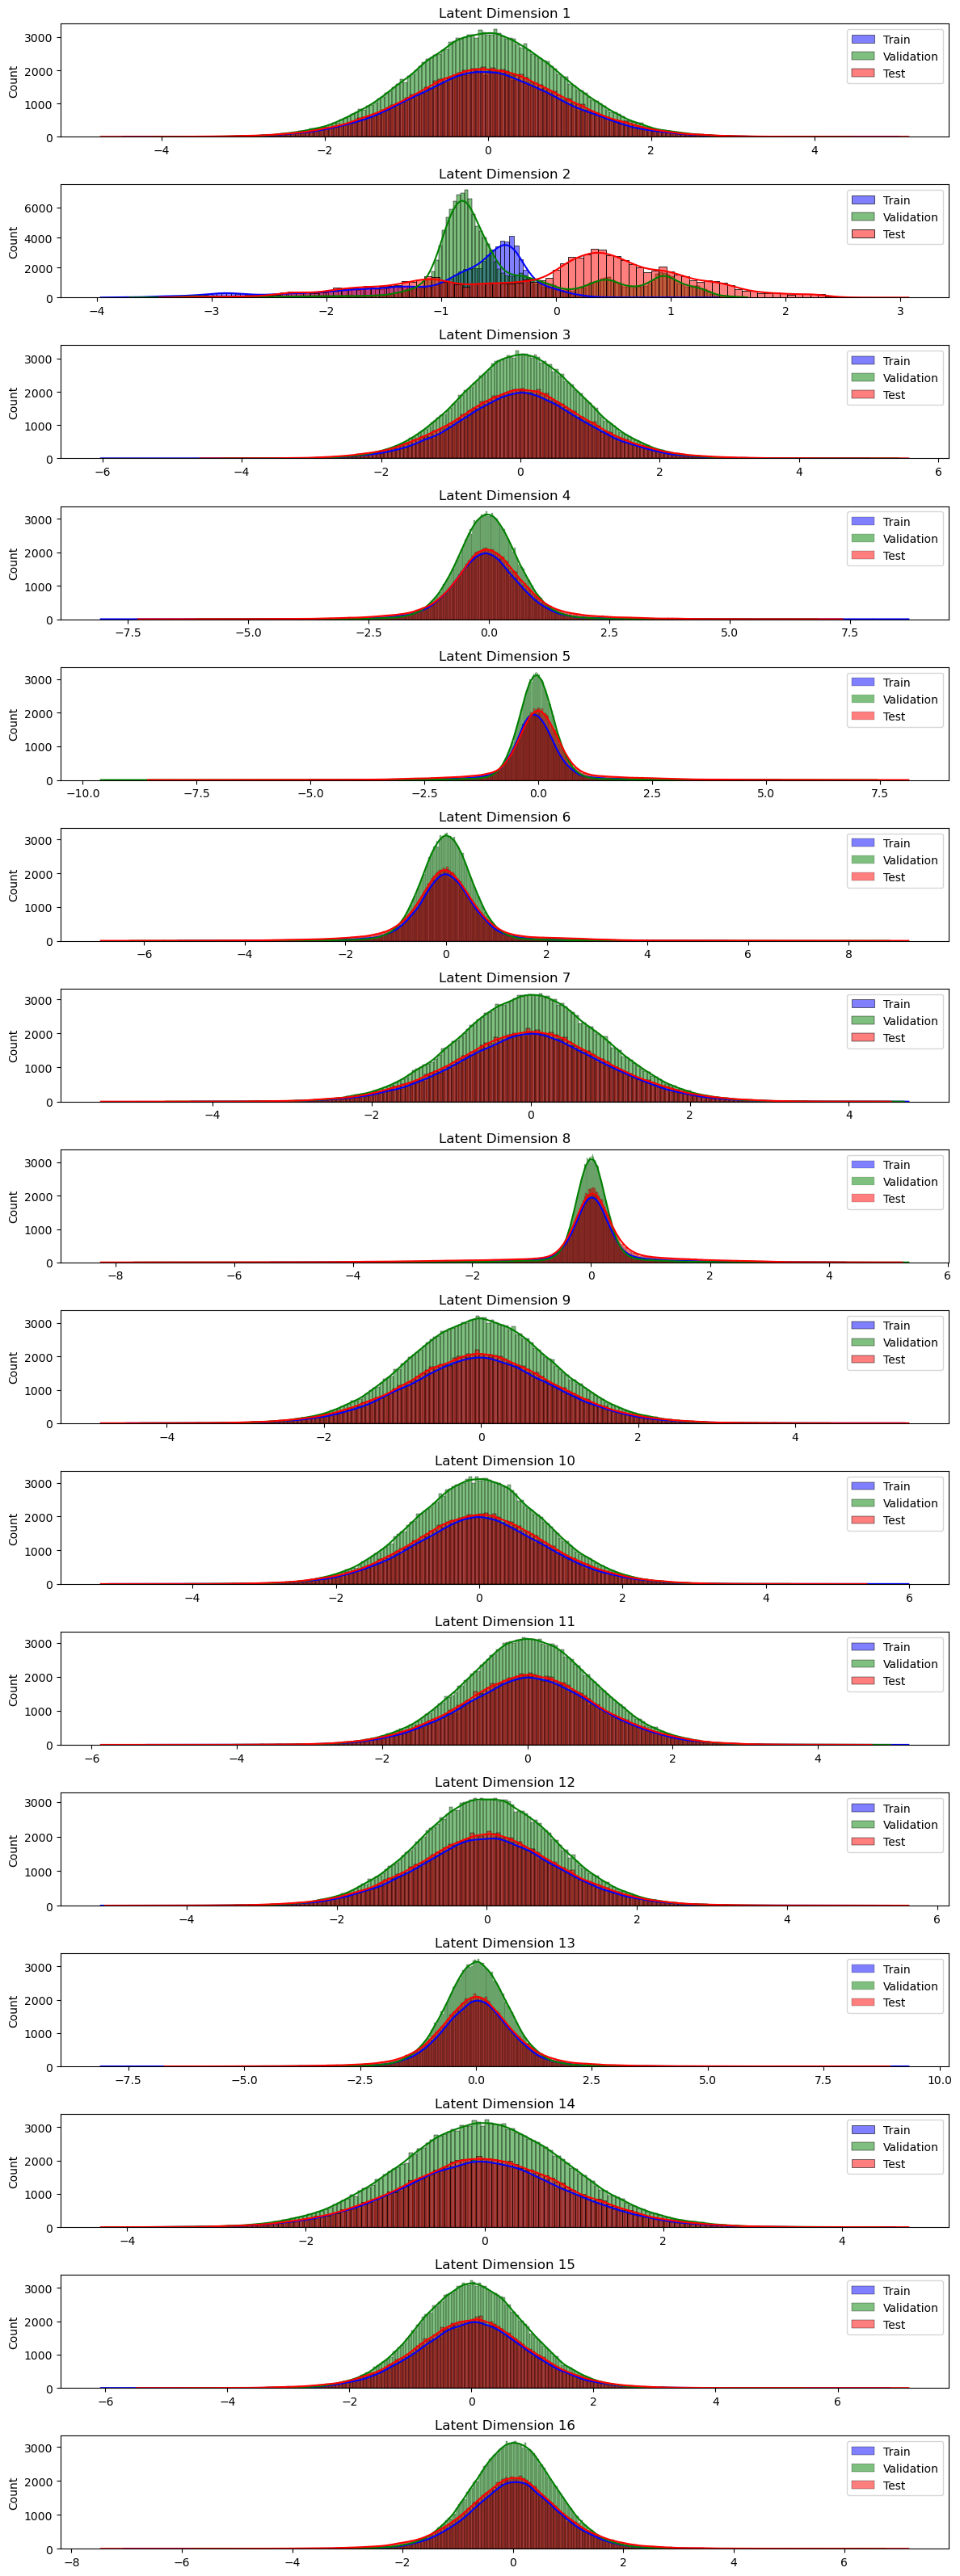

In [109]:
import matplotlib.pyplot as plt

# Plot histograms for each latent dimension
latent_dim = train_dis_np.shape[1]
fig, axes = plt.subplots(latent_dim, 1, figsize=(12, 2 * latent_dim))

for i in range(latent_dim):
    sns.histplot(train_dis_np[:, i], ax=axes[i], color='blue', label='Train', kde=True, alpha=0.5)
    sns.histplot(val_dis_np[:, i], ax=axes[i], color='green', label='Validation', kde=True, alpha=0.5)
    sns.histplot(test_dis_np[:, i], ax=axes[i], color='red', label='Test', kde=True, alpha=0.5)
    axes[i].set_title(f'Latent Dimension {i+1}')
    axes[i].legend()

plt.tight_layout()
plt.show()


In [114]:
final_x_train_reshaped[:,:,0].shape

(76904, 32)

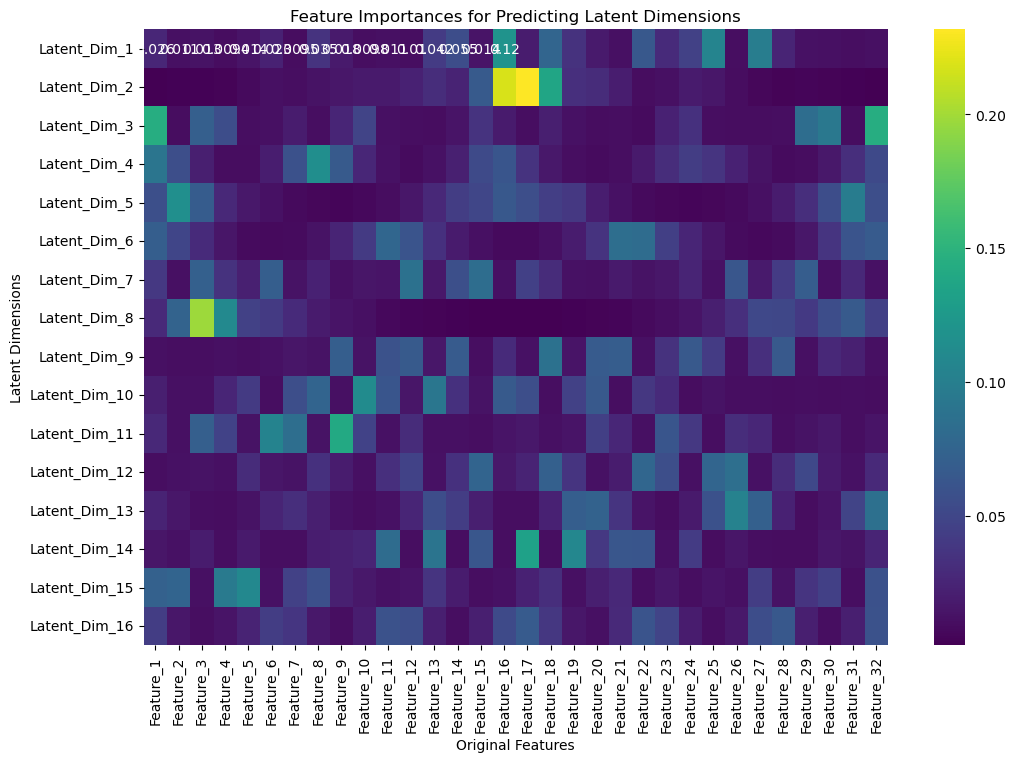

In [115]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define the original features and latent dimensions
X = final_x_train_reshaped[:,:,0]  # The original training features
Y = train_dis_np  # The latent dimensions

# Train a separate model for each latent dimension
feature_importances = []
for i in range(Y.shape[1]):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, Y[:, i])
    feature_importances.append(model.feature_importances_)

# Convert to a DataFrame for easier visualization
feature_importances_df = pd.DataFrame(feature_importances, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
feature_importances_df.index = [f'Latent_Dim_{i+1}' for i in range(Y.shape[1])]

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.heatmap(feature_importances_df, annot=True, cmap='viridis')
plt.title('Feature Importances for Predicting Latent Dimensions')
plt.xlabel('Original Features')
plt.ylabel('Latent Dimensions')
plt.show()


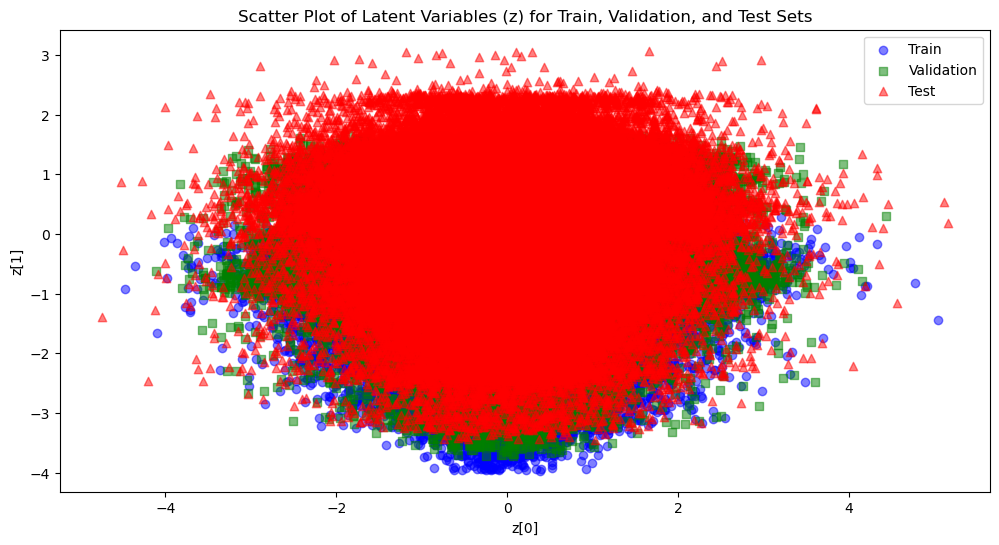

In [101]:
# Plotting the distributions of the latent variables
plt.figure(figsize=(12, 6))

# Scatter plot for train_dis
plt.scatter(train_dis_np[:, 0], train_dis_np[:, 1], alpha=0.5, label='Train', color='blue', marker='o')

# Scatter plot for val_dis
plt.scatter(val_dis_np[:, 0], val_dis_np[:, 1], alpha=0.5, label='Validation', color='green', marker='s')

# Scatter plot for test_dis
plt.scatter(test_dis_np[:, 0], test_dis_np[:, 1], alpha=0.5, label='Test', color='red', marker='^')

plt.title('Scatter Plot of Latent Variables (z) for Train, Validation, and Test Sets')
plt.xlabel('z[0]')
plt.ylabel('z[1]')
plt.legend()
plt.show()

In [133]:
z_mean, z_log_var, z = vae_training.encoder(X_train)
reconstructed_data = vae_training.decoder(z)


In [150]:
for i in range (10):
    print('---------------------')
    print(X_train[i,1,:])
    print('############')
    print(reconstructed_data[i,1,:])


---------------------
[ 1.11763652 -3.59237841 -3.18750697 -4.57059346 -1.98010265  2.44768154
 -2.46804807 -1.84910004 -1.86406293 -2.27627369 -2.1609214  -1.4852394
 -3.93417086 -1.11033013 -2.14149679 -3.1364841  -3.78265867  3.37815534
  3.05150443 -2.64320151 -2.97732333  1.95284482  2.47903284  1.19972031
 -0.01941069 -5.16724729 -6.31932984 -5.35188429 -5.22421076 -3.53073886
 -3.31294476 -0.88536981  2.72978066  0.38092569 -3.4261269   2.93724541
 -3.82231524  2.69142368 -3.96695778 -3.64674726 -3.78690677 -4.4856902
  1.47919275 -4.4867107   0.77170454 -2.60188683  3.31070135  3.15283393
 -1.97491593]
############
tf.Tensor(
[ 0.74228644 -4.130313   -3.4390564  -5.7422748  -2.023992    2.0484588
 -2.4024482  -2.2982113  -2.319829   -2.589933   -2.531744   -1.6642746
 -4.65458    -1.5052155  -2.2005374  -4.0607824  -4.600594    4.1338205
  3.6728587  -2.8244076  -3.1353655   1.5174643   2.4303908   1.0974542
 -0.0861952  -5.095512   -5.601454   -5.137611   -5.109896   -3.838177

In [ ]:
from bokeh.plotting import figure, show, output_notebook, save
from bokeh.models import ColumnDataSource,HoverTool

output_notebook()

TIME_STEPS = 32


def reverse_windows(windows, original_length):
    series = np.zeros((original_length,))
    count = np.zeros((original_length,))
    for i, window in enumerate(windows):
        window_np = window.numpy().flatten() if isinstance(window, tf.Tensor) else window.flatten()
        series[i:i+TIME_STEPS] += window_np
        count[i:i+TIME_STEPS] += 1
    return series / count

def denormalize(data, mean, std):
    """Denormalize the data."""
    return data * std + mean



# Encode and decode the sample
z_mean, z_log_var, z = vae.encoder(X_train)
reconstructed_data = vae.decoder(z)
original_length = len(training_df)  # Adjust based on your original data length


# Reverse windowing for the training, validation, and test sets
reversed_original = reverse_windows(X_train,original_length)
reversed_reconstructed = reverse_windows(reconstructed_data,original_length)

# reconstructed_val = reverse_sequences(final_x_val_reshaped)
# reconstructed_test = reverse_sequences(final_x_test_reshaped)

# Denormalize the data
# denormalized_train = denormalize(reversed_original, training_mean, training_std)
# denormalized_val = denormalize(reconstructed_val, training_mean, training_std)
# denormalized_test = denormalize(reconstructed_test, training_mean, training_std)

# If needed, convert to DataFrame for easier handling
# df_denormalized_train = pd.DataFrame(denormalized_train, columns=training_data.columns[1:])
# df_denormalized_val = pd.DataFrame(denormalized_val, columns=validation_data.columns[1:])
# df_denormalized_test = pd.DataFrame(denormalized_test, columns=testing_data.columns[1:])

# Optionally add timestamps back to the DataFrame
# df_denormalized_train['Timestamps'] = training_data['Timestamps'][:len(df_denormalized_train)]
# df_denormalized_val['Timestamps'] = validation_data['Timestamps'][:len(df_denormalized_val)]
# df_denormalized_test['Timestamps'] = testing_data['Timestamps'][:len(df_denormalized_test)]

# Reorder columns to place 'Timestamps' first
# df_denormalized_train = df_denormalized_train[['Timestamps'] + [col for col in df_denormalized_train if col != 'Timestamps']]
# df_denormalized_val = df_denormalized_val[['Timestamps'] + [col for col in df_denormalized_val if col != 'Timestamps']]
# df_denormalized_test = df_denormalized_test[['Timestamps'] + [col for col in df_denormalized_test if col != 'Timestamps']]


# Prepare the data for Bokeh
timestamps = training_df['Timestamps'].values
print(reversed_original.shape)

# Prepare a DataFrame for easy handling
df = pd.DataFrame({
    'Timestamp': timestamps,
    'Original': reversed_original,
    'Reconstructed': reversed_reconstructed
})

# Create a ColumnDataSource
source = ColumnDataSource(df)

# Create the plot
p = figure(x_axis_type="datetime", title="Original and Reconstructed Data", x_axis_label="Timestamp", y_axis_label="GT2 NO1 BRG ROTOR VIBRATION -X", height=1000, width=1800)

# Plot original data
p.line(x='Timestamp', y='Original', source=source, legend_label="Original Data", line_color="blue")

# Plot reconstructed data
p.line(x='Timestamp', y='Reconstructed', source=source, legend_label="Reconstructed Data", line_color="red", line_dash="dashed")



# Add tooltips
hover = HoverTool()
hover.tooltips = [
    ("Timestamp", "@Timestamp{%F %T}"),
    ("Original", "@Original"),
    ("Reconstructed", "@Reconstructed")
]
hover.formatters = {'@Timestamp': 'datetime'}
p.add_tools(hover)

p.legend.location = "top_left"

# Save the plot as an HTML file
save(p, filename="vae.html", title="Original and Reconstructed Data")

# Show the plot in the notebook
show(p)





In [ ]:
def plot_time_series(original, reconstructed, num_samples=10):
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        plt.subplot(num_samples, 1, i + 1)
        plt.plot(original[i], label='Original')
        plt.plot(reconstructed[i], label='Reconstructed')
        plt.legend()
    plt.tight_layout()
    plt.show()

plot_time_series(sample_data, reconstructed_data, num_samples)

In [178]:

log_dir='D:\\KaiJung Wu\\Code\\Code\\Code\\Code\\cnn_tuner\\GT2 NO1 BRG ROTOR VIBRATION -X\\20240627-112141\\Best_Model'
best_model = keras.models.load_model(log_dir + '\\CNN_HP.model.keras')

In [187]:
# Make predictions on the training and validation data
train_predictions = best_model.predict(X_train)
val_predictions = best_model.predict(X_val)
test_predictions = best_model.predict(X_test)
# Reverse the normalization
train_predictions_denorm = train_predictions * training_std[target_column] + training_mean[target_column]
val_predictions_denorm = val_predictions * training_std[target_column] + training_mean[target_column]
test_predictions_denorm = test_predictions * training_std[target_column] + training_mean[target_column]

y_train_denorm = y_train * training_std[target_column] + training_mean[target_column]
y_val_denorm = y_val * training_std[target_column] + training_mean[target_column]
y_test_denorm = y_test * training_std[target_column] + training_mean[target_column]

from sklearn.metrics import mean_squared_error

# Calculate MSE for training, validation, and test sets
train_mse = mean_squared_error(y_train_denorm, train_predictions_denorm)
val_mse = mean_squared_error(y_val_denorm, val_predictions_denorm)
test_mse = mean_squared_error(y_test_denorm, test_predictions_denorm)

# Print the MSE values
print("Training MSE:", train_mse)
print("Validation MSE:", val_mse)
print("Test MSE:", test_mse)


2760/2760 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step
2245/2245 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step
524/524 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Training MSE: 0.46045505916354185
Validation MSE: 2.349019782428916e+16
Test MSE: 1.8484963736389595


In [173]:
loss=model.evaluate([X_train,X_train],y_train)

print(loss)




AttributeError: 'RandomForestRegressor' object has no attribute 'evaluate'

In [97]:
from sklearn.metrics import mean_squared_error

# Assuming best_model is already defined and trained
# Make predictions on the training, validation, and test data
train_predictions = model.predict([X_train,X_train])
val_predictions = model.predict([X_val,X_val])
test_predictions = model.predict([X_test,X_test])

# Reverse the normalization for predictions
train_predictions_denorm = train_predictions * training_std[target_column] + training_mean[target_column]
val_predictions_denorm = val_predictions * training_std[target_column] + training_mean[target_column]
test_predictions_denorm = test_predictions * training_std[target_column] + training_mean[target_column]

# Reverse the normalization for actual values
y_train_denorm = y_train * training_std[target_column] + training_mean[target_column]
y_val_denorm = y_val * training_std[target_column] + training_mean[target_column]
y_test_denorm = y_test * training_std[target_column] + training_mean[target_column]

# Calculate MSE for training, validation, and test sets
train_mse = mean_squared_error(y_train_denorm, train_predictions_denorm)
val_mse = mean_squared_error(y_val_denorm, val_predictions_denorm)
test_mse = mean_squared_error(y_test_denorm, test_predictions_denorm)

# Print the MSE values
print("Training MSE:", train_mse)
print("Validation MSE:", val_mse)
print("Test MSE:", test_mse)




2760/2760 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step
2245/2245 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
524/524 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Training MSE: 1.8670516401807347
Validation MSE: 104512671933596.56
Test MSE: 1.5573698757176007


Training Errors: [ 0.36515111  0.60781473  0.25117288 ...  0.31280838  0.04923204
 -0.57619797]
Test Errors: [-0.63750139  0.84095908  2.01333658 ...  1.97033244  1.69996975
  1.34392816]
Training MSE: 0.46045505916354185
Testing MSE: 1.8484963736389595


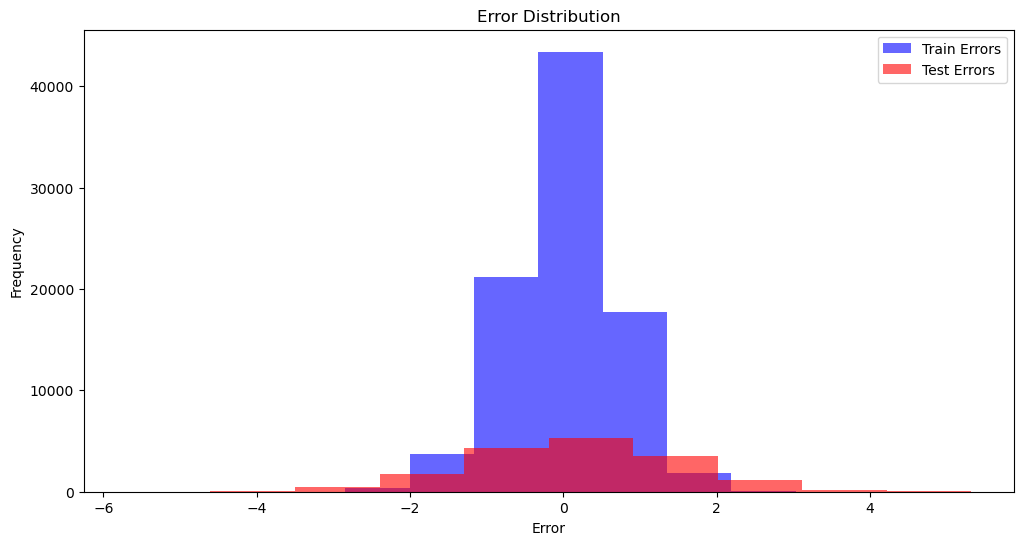

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate errors
train_errors = train_predictions_denorm[:,0]- y_train_denorm
test_errors = test_predictions_denorm[:,0] - y_test_denorm
val_errors = val_predictions_denorm[:,0] - y_val_denorm

# Print the errors
print("Training Errors:", train_errors)
print("Test Errors:", test_errors)

# Calculate MSE
train_mse = np.mean(np.square(train_errors))
test_mse = np.mean(np.square(test_errors))

# Print the MSE values
print(f'Training MSE: {train_mse}')
print(f'Testing MSE: {test_mse}')

# Plot error distributions
plt.figure(figsize=(12, 6))

plt.hist(train_errors, bins=10, color='blue', alpha=0.6, label='Train Errors')
plt.hist(test_errors, bins=10, color='red', alpha=0.6, label='Test Errors')
#plt.hist(val_errors, bins=10, color='green', alpha=0.6, label='Val Errors')

plt.title('Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()


95% Confidence Interval for Training Errors: -1.4069891363143912 1.3119592164993283
Test Anomalies: [    2     7    12 ... 16748 16749 16750]


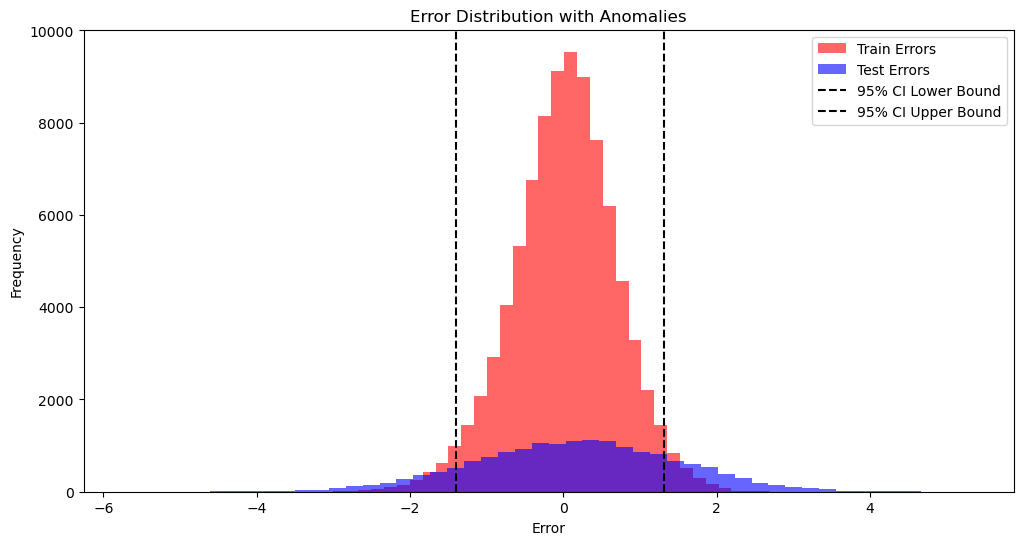

In [54]:

# Calculate the 95% Confidence Interval for Training Errors
lower_bound = np.percentile(train_errors, 2.5)
upper_bound = np.percentile(train_errors, 97.5)

print("95% Confidence Interval for Training Errors:", lower_bound, upper_bound)

# Identify anomaly points
#val_anomalies = (val_errors < lower_bound) | (val_errors > upper_bound)
test_anomalies = (test_errors < lower_bound) | (test_errors > upper_bound)

#val_anomaly_points = np.where(val_anomalies)[0]
test_anomaly_points = np.where(test_anomalies)[0]

#print("Validation Anomalies:", val_anomaly_points)
print("Test Anomalies:", test_anomaly_points)

# Plot error distributions with anomaly points
plt.figure(figsize=(12, 6))

plt.hist(train_errors, bins=50, color='red', alpha=0.6, label='Train Errors')
#plt.hist(val_errors, bins=50, color='green', alpha=0.6, label='Validation Errors')
plt.hist(test_errors, bins=50, color='blue', alpha=0.6, label='Test Errors')

# Mark anomalies on the histogram (for visualization purpose)
plt.axvline(lower_bound, color='black', linestyle='--', label='95% CI Lower Bound')
plt.axvline(upper_bound, color='black', linestyle='--', label='95% CI Upper Bound')

plt.title('Error Distribution with Anomalies')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the means and standard deviations
train_mean, train_std = np.mean(train_errors), np.std(train_errors)
val_mean, val_std = np.mean(val_errors), np.std(val_errors)
test_mean, test_std = np.mean(test_errors), np.std(test_errors)

print(f"Train Errors: Mean = {train_mean}, Std = {train_std}")
print(f"Validation Errors: Mean = {val_mean}, Std = {val_std}")
print(f"Test Errors: Mean = {test_mean}, Std = {test_std}")

# Plot data distributions and error distributions
plt.figure(figsize=(12, 6))

# Data distribution
sns.kdeplot(train_predictions_denorm.flatten(), label='Train Data Distribution', color='red', fill=True, alpha=0.4)
#sns.kdeplot(val_predictions_denorm.flatten(), label='Validation Data Distribution', color='green', fill=True, alpha=0.4)
sns.kdeplot(test_predictions_denorm.flatten(), label='Test Data Distribution', color='blue', fill=True, alpha=0.4)

# Error distribution
sns.kdeplot(train_errors.flatten(), label='Train Error Distribution', color='red', linestyle='--')
#sns.kdeplot(val_errors.flatten(), label='Validation Error Distribution', color='green', linestyle='--')
sns.kdeplot(test_errors.flatten(), label='Test Error Distribution', color='blue', linestyle='--')


sns.kdeplot(y_train_denorm.flatten(), label='Train  Distribution', color='red')
#sns.kdeplot(y_val_denorm.flatten(), label=' Error Distribution', color='green')
sns.kdeplot(y_test_denorm.flatten(), label='Test  Distribution', color='blue')


plt.title('Data and Error Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(loc='upper right')

plt.show()


In [177]:
print(log_dirs)

cnn_tuner\GT2 NO1 BRG ROTOR VIBRATION -X\20240628-125621


In [174]:
import numpy as np
import pandas as pd
from bokeh.plotting import figure, show, output_notebook, save
from bokeh.models import ColumnDataSource, HoverTool

output_notebook()

# Prepare the data for Bokeh
timestamps_train = training_df['Timestamps'].values[:len(y_train_denorm),0]
timestamps_val = validation_df['Timestamps'].values[:len(y_val_denorm),0]
timestamps_test = testing_df['Timestamps'].values[:len(y_test_denorm),0]

# Ensure all columns are one-dimensional arrays
y_train_denorm = y_train_denorm.flatten()
train_predictions_denorm = train_predictions_denorm.flatten()
y_val_denorm = y_val_denorm.flatten()
val_predictions_denorm = val_predictions_denorm.flatten()
y_test_denorm = y_test_denorm.flatten()
test_predictions_denorm = test_predictions_denorm.flatten()

assert y_train_denorm.ndim == 1, "y_train_denorm shape is not correct"
assert train_predictions_denorm.ndim == 1, "train_predictions_denorm shape is not correct"
assert y_val_denorm.ndim == 1, "y_val_denorm shape is not correct"
assert val_predictions_denorm.ndim == 1, "val_predictions_denorm shape is not correct"
assert y_test_denorm.ndim == 1, "y_test_denorm shape is not correct"
assert test_predictions_denorm.ndim == 1, "test_predictions_denorm shape is not correct"
assert timestamps_train.ndim == 1, "timestamps_train shape is not correct"
#assert timestamps_val.ndim == 1, "timestamps_val shape is not correct"
assert timestamps_test.ndim == 1, "timestamps_test shape is not correct"

# Prepare DataFrames for easy handling
df_train = pd.DataFrame({
    'Timestamp': timestamps_train,
    'Original': y_train_denorm,
    'Prediction': train_predictions_denorm
})

df_val = pd.DataFrame({
    'Timestamp': timestamps_val,
    'Original': y_val_denorm,
    'Prediction': val_predictions_denorm
})

df_test = pd.DataFrame({
    'Timestamp': timestamps_test,
    'Original': y_test_denorm,
    'Prediction': test_predictions_denorm
})

# Create ColumnDataSources
source_train = ColumnDataSource(df_train)
source_val = ColumnDataSource(df_val)
source_test = ColumnDataSource(df_test)

def save_plot(source_df, name: str):
    # Create the plot
    p = figure(x_axis_type="datetime", title="Original and Prediction Data", x_axis_label="Timestamp", y_axis_label=target_column, height=1000, width=1800)

    # Plot original data
    p.line(x='Timestamp', y='Original', source=source_df, legend_label=f"Original {name} Data", line_color="blue")
    # Plot prediction data
    p.line(x='Timestamp', y='Prediction', source=source_df, legend_label=f"Prediction {name} Data", line_color="red", line_dash="dashed")

    # Add tooltips
    hover = HoverTool()
    hover.tooltips = [
        ("Timestamp", "@Timestamp{%F %T}"),
        ("Original", "@Original"),
        ("Prediction", "@Prediction")
    ]
    hover.formatters = {'@Timestamp': 'datetime'}
    p.add_tools(hover)

    p.legend.location = "top_left"

    # Save the plot as an HTML file
    save(p,  filename=os.path.join(self_atttention_cnn_dir, f"NO1X_data_{name}_and_predictions.html"), title="Original and Prediction Data")

save_plot(source_train, 'Train')
save_plot(source_val, 'Validation')
save_plot(source_test, 'Test')



Loading BokehJS ...

C:\Users\CSEUser2\AppData\Local\Temp\ipykernel_71580\95191710.py:77: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  save(p,  filename=os.path.join(self_atttention_cnn_dir, f"NO1X_data_{name}_and_predictions.html"), title="Original and Prediction Data")


In [31]:
h5_dir='D:\\KaiJung Wu\\Code\\Code\\Code\\Code\\logs_cnn-logs\\shuffle\\cnn_with_pooling.weights.h5'
model = keras.models.load_model(h5_dir)

ValueError: No model config found in the file at D:\KaiJung Wu\Code\Code\Code\Code\logs_cnn-logs\shuffle\cnn_with_pooling.weights.h5.

In [41]:
input_data = np.random.rand(1, 30, 52)

input_data.shape

(1, 30, 52)

In [33]:
def make_gradcam_heatmap(sample, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Record operations for automatic differentiation
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(sample)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        loss = predictions[:, pred_index]

    # Gradient of the top predicted class with respect to the conv layer output
    grads = tape.gradient(loss, conv_outputs)

    # Pool the gradients across the time steps
    pooled_grads = tf.reduce_max(grads, axis=(0, 1))

    # Weight the output feature map with the computed gradients
    conv_outputs = conv_outputs[0]
    heatmap = tf.matmul(conv_outputs, pooled_grads[..., tf.newaxis])
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

TypeError: Invalid shape (6,) for image data

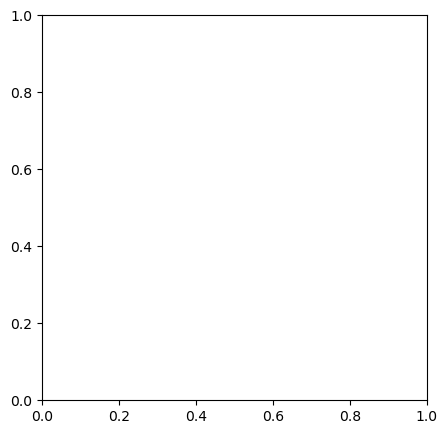

In [34]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

def make_gradcam_heatmap(sample, model, last_conv_layer_name, pred_index=None):
    # Create a model that maps the input image to the activations of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        inputs=model.inputs, 
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Record operations for automatic differentiation
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(sample)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        loss = predictions[:, pred_index]

    # Compute gradients of the top predicted class for our sample with respect to the outputs of the last conv layer
    grads = tape.gradient(loss, conv_outputs)

    # Pool the gradients across the width and height dimensions
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))

    # Weigh the output feature map with the gradients
    conv_outputs = conv_outputs[0]
    heatmap = tf.matmul(conv_outputs, pooled_grads[..., tf.newaxis])
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def display_gradcam(img_array, heatmap, alpha=0.4):
    plt.figure(figsize=(10, 5))
    
    # Display the feature map heatmap
    plt.imshow(heatmap, cmap='jet', alpha=alpha)
    plt.colorbar()
    plt.title('Grad-CAM Heatmap')
    plt.xlabel('Time Steps')
    plt.ylabel('Features')
    
    plt.show()



# Prepare a sample input (replace this with your actual input data)
sample_input = X_train[0:1]  # Example input shape (batch_size, timesteps, features)

# Generate the Grad-CAM heatmap
layer_name = 'Conv1D_3'  # The layer you want to visualize
heatmap = make_gradcam_heatmap(sample_input, cnn_model, layer_name)

# Display the heatmap
display_gradcam(sample_input, heatmap)


In [54]:


# Identify anomaly points
val_anomalies = (val_errors < lower_bound) | (val_errors > upper_bound)
test_anomalies = (test_errors < lower_bound) | (test_errors > upper_bound)

val_anomaly_points = np.where(val_anomalies)[0]
test_anomaly_points = np.where(test_anomalies)[0]



print("Validation Anomalies:", val_anomaly_points)
print("Test Anomalies:", test_anomaly_points)

# Prepare the data for Bokeh

timestamps_train = training_df['Timestamps'].values[:len(y_train_denorm),0]
timestamps_val = validation_df['Timestamps'].values[:len(y_val_denorm),0]
timestamps_test = testing_df['Timestamps'].values[:len(y_test_denorm),0]
# Ensure all columns are one-dimensional arrays
y_train_denorm = y_train_denorm.flatten()
train_predictions_denorm = train_predictions_denorm.flatten()
y_val_denorm = y_val_denorm.flatten()
val_predictions_denorm = val_predictions_denorm.flatten()
y_test_denorm = y_test_denorm.flatten()
test_predictions_denorm = test_predictions_denorm.flatten()

# Prepare DataFrames for easy handling
df_train = pd.DataFrame({
    'Timestamp': timestamps_train,
    'Original': y_train_denorm,
    'Prediction': train_predictions_denorm
})

df_val = pd.DataFrame({
    'Timestamp': timestamps_val,
    'Original': y_val_denorm,
    'Prediction': val_predictions_denorm
})

df_test = pd.DataFrame({
    'Timestamp': timestamps_test,
    'Original': y_test_denorm,
    'Prediction': test_predictions_denorm
})

# Create ColumnDataSources
source_train = ColumnDataSource(df_train)
source_val = ColumnDataSource(df_val)
source_test = ColumnDataSource(df_test)

# Get the anomaly points for validation and test datasets
val_anomaly_timestamps = timestamps_val[val_anomaly_points]
val_anomaly_values = val_predictions_denorm[val_anomaly_points]

test_anomaly_timestamps = timestamps_test[test_anomaly_points]
test_anomaly_values = test_predictions_denorm[test_anomaly_points]

# Create ColumnDataSources for Anomalies
df_val_anomalies = pd.DataFrame({
    'Timestamp': val_anomaly_timestamps,
    'Anomaly': val_anomaly_values
})

df_test_anomalies = pd.DataFrame({
    'Timestamp': test_anomaly_timestamps,
    'Anomaly': test_anomaly_values
})

source_val_anomalies = ColumnDataSource(df_val_anomalies)
source_test_anomalies = ColumnDataSource(df_test_anomalies)

def save_plot(source_df, source_anomalies, name: str):
    # Create the plot
    p = figure(x_axis_type="datetime", title="Original and Prediction Data with Anomalies", x_axis_label="Timestamp", y_axis_label=target_column, height=1000, width=1800)

    # Plot original data
    p.line(x='Timestamp', y='Original', source=source_df, legend_label=f"Original {name} Data", line_color="blue")
    # Plot prediction data
    p.line(x='Timestamp', y='Prediction', source=source_df, legend_label=f"Prediction {name} Data", line_color="red", line_dash="dashed")

    if source_anomalies is not None:
        # Plot anomaly points
        p.circle(x='Timestamp', y='Anomaly', source=source_anomalies, legend_label=f"Anomaly {name} Points", color="orange", size=5)

    # Add tooltips
    hover = HoverTool()
    hover.tooltips = [
        ("Timestamp", "@Timestamp{%F %T}"),
        ("Original", "@Original"),
        ("Prediction", "@Prediction"),
        ("Anomaly", "@Anomaly")
    ]
    hover.formatters = {'@Timestamp': 'datetime'}
    p.add_tools(hover)

    p.legend.location = "top_left"

    # Save the plot as an HTML file
    save(p, filename=f"no1x_data_{name}_and_predictions_with_anomalies.html", title="Original and Prediction Data with Anomalies")

# Plot and save the train, validation, and test sets with anomalies
save_plot(source_train, None, 'Train_no_pool')  # Training set has no anomalies in this example
save_plot(source_val, source_val_anomalies, 'Validation_no_pool')
save_plot(source_test, source_test_anomalies, 'Test_no_pool')


Validation Anomalies: [    4    26    29 ... 71818 71819 71820]
Test Anomalies: [    0     1     2 ... 82723 82731 82738]


C:\Users\CSEUser2\AppData\Local\Temp\ipykernel_15860\1663583564.py:98: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  save(p, filename=f"no1x_data_{name}_and_predictions_with_anomalies.html", title="Original and Prediction Data with Anomalies")


In [ ]:
timestamps_train = training_df['Timestamps'].values[:len(y_train_denorm),0]
timestamps_val = validation_df['Timestamps'].values[:len(y_val_denorm),0]
timestamps_test = testing_df['Timestamps'].values[:len(y_test_denorm),0]
# Ensure all columns are one-dimensional arrays
y_train_denorm = y_train_denorm.flatten()
train_predictions_denorm = train_predictions_denorm.flatten()
y_val_denorm = y_val_denorm.flatten()
val_predictions_denorm = val_predictions_denorm.flatten()
y_test_denorm = y_test_denorm.flatten()
test_predictions_denorm = test_predictions_denorm.flatten()
# Ensure all columns are one-dimensional arrays


# Prepare DataFrames for easy handling
df_train = pd.DataFrame({
    'Timestamp': timestamps_train,
    'Original': y_train_denorm,
    'Prediction': train_predictions_denorm
})

df_val = pd.DataFrame({
    'Timestamp': timestamps_val,
    'Original': y_val_denorm,
    'Prediction': val_predictions_denorm
})

df_test = pd.DataFrame({
    'Timestamp': timestamps_test,
    'Original': y_test_denorm,
    'Prediction': test_predictions_denorm
})

# Create ColumnDataSources
source_train = ColumnDataSource(df_train)
source_val = ColumnDataSource(df_val)
source_test = ColumnDataSource(df_test)

def save_plot(source_df, name: str):
    # Create the plot
    p = figure(x_axis_type="datetime", title="Original and Prediction Data", x_axis_label="Timestamp", y_axis_label=target_column, height=1000, width=1800)

    # Plot original data
    p.line(x='Timestamp', y='Original', source=source_df, legend_label=f"Original {name} Data", line_color="blue")
    # Plot prediction data
    p.line(x='Timestamp', y='Prediction', source=source_df, legend_label=f"Prediction {name} Data", line_color="red", line_dash="dashed")

    # Add tooltips
    hover = HoverTool()
    hover.tooltips = [
        ("Timestamp", "@Timestamp{%F %T}"),
        ("Original", "@Original"),
        ("Prediction", "@Prediction")
    ]
    hover.formatters = {'@Timestamp': 'datetime'}
    p.add_tools(hover)

    p.legend.location = "top_left"

    # Save the plot as an HTML file
    save(p, filename=f"no1x_data_{name}_and_predictions.html", title="Original and Prediction Data")

save_plot(source_train, 'Train')
save_plot(source_val, 'Validation')
save_plot(source_test, 'Test')


In [66]:
df_train

NameError: name 'df_train' is not defined

In [49]:
import numpy as np
import pandas as pd
from bokeh.plotting import figure, show, output_notebook, save
from bokeh.models import ColumnDataSource, HoverTool

output_notebook()

# Prepare the data for Bokeh
timestamps_train = training_df['Timestamps'].values[:len(y_train_denorm)]
timestamps_val = validation_df['Timestamps'].values[:len(y_val_denorm)]
timestamps_test = testing_df['Timestamps'].values[:len(y_test_denorm)]
# Prepare DataFrames for easy handling
df_train = pd.DataFrame({
    'Timestamp': timestamps_train,
    'Original': y_train_denorm,#.flatten(),
    'Preditcion': train_predictions_denorm.flatten()
})

df_val = pd.DataFrame({
    'Timestamp': timestamps_val,
    'Original': y_val_denorm,#.flatten(),
    'Preditcion': val_predictions_denorm.flatten()
})

df_test = pd.DataFrame({
    'Timestamp': timestamps_test,
    'Original': y_test_denorm,#.flatten(),
    'Preditcion': test_predictions_denorm.flatten()
})

# Create ColumnDataSources
source_train = ColumnDataSource(df_train)
source_val = ColumnDataSource(df_val)
source_test = ColumnDataSource(df_test)

def save_plot(source_df,name:str):

    # Create the plot
    p = figure(x_axis_type="datetime", title="Original and Prediction Data", x_axis_label="Timestamp", y_axis_label=target_column, height=1000, width=1800)

    # Plot original data (train)
    p.line(x='Timestamp', y='Original', source=source_df, legend_label=f"Original {name} Data", line_color="blue")
    # Plot reconstructed data (train)
    p.line(x='Timestamp', y='Preditcion', source=source_df, legend_label=f"Prediction {name} Data", line_color="red", line_dash="dashed")

    # Add tooltips
    hover = HoverTool()
    hover.tooltips = [
        ("Timestamp", "@Timestamp{%F %T}"),
        ("Original", "@Original"),
        ("Preditcion", "@Preditcion")
    ]
    hover.formatters = {'@Timestamp': 'datetime'}
    p.add_tools(hover)

    p.legend.location = "top_left"

    # Save the plot as an HTML file
    save(p, filename=f"no1x_data_{name}_and_predictions.html", title="Original and Preditcion Data")

save_plot(source_train,'Train')
save_plot(source_val,'Validation')
save_plot(source_test,'Test')

ValueError: Per-column arrays must each be 1-dimensional


Loading BokehJS ...

ValueError: Per-column arrays must each be 1-dimensional

In [ ]:
import seaborn as sns
df_std = (load_df.iloc[:,1:-2] - training_mean) / training_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(load_df.iloc[:,1:-2].keys(), rotation=90)

In [ ]:
X_train[:,:,1]
VAE_X_train = X_train[:,:,1].reshape(X_train[:,:,1].shape[0], X_train[:,:,1].shape[1], 1)
print(VAE_X_train.shape)

In [ ]:
import random
from keras import backend 

In [ ]:
class Sampling(keras.layers.Layer):
    """Uses (z_mean, z_var) to sample z, the vector encoding a digit."""
    def call(self, inputs):
        z_mean, z_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_var) * epsilon

class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)
        kl_loss = -0.5 * tf.reduce_sum(
            1 + z_var - tf.square(z_mean) - tf.exp(z_var), axis=-1
        )
        self.add_loss(tf.reduce_mean(kl_loss))
        return reconstructed

def create_vae_model(input_shape, latent_dim):
    # Define encoder model.
    img_inputs = keras.Input(shape=input_shape)
    x = keras.layers.Conv1D(32, 3, padding='same', activation='relu')(img_inputs)
    x = keras.layers.Conv1D(64, 3, strides=2, padding='same', activation='relu')(x)
    x = keras.layers.Conv1D(64, 3, strides=2, padding='same', activation='relu')(x)
    x = keras.layers.Conv1D(64, 3, padding='same', activation='relu')(x)
    shape_before_flatten = x.shape
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(32, activation='relu')(x)
    z_mean = keras.layers.Dense(latent_dim)(x)
    z_var = keras.layers.Dense(latent_dim)(x)
    z = Sampling()([z_mean, z_var])
    encoder = keras.Model(inputs=img_inputs, outputs=[z_mean, z_var, z], name='encoder')
    encoder.summary()

    # Define decoder model.
    latent_inputs = keras.Input(shape=(latent_dim,))
    x = keras.layers.Dense(np.prod(shape_before_flatten[1:]), activation='relu')(latent_inputs)
    x = keras.layers.Reshape(target_shape=shape_before_flatten[1:])(x)
    x = keras.layers.Conv1DTranspose(64, 3, strides=2, padding='same', activation='relu')(x)
    x = keras.layers.Conv1DTranspose(64, 3, strides=2, padding='same', activation='relu')(x)
    img_outputs = keras.layers.Conv1D(1, 3, padding='same', activation='sigmoid')(x)
    decoder = keras.Model(inputs=latent_inputs, outputs=img_outputs, name='decoder')
    decoder.summary()

    # Define VAE model.
    vae = VAE(encoder, decoder)
    vae.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss=keras.losses.MeanSquaredError())
    return vae

input_shape = (VAE_X_train.shape[1], VAE_X_train.shape[2])
latent_dim = 1
vae_model = create_vae_model(input_shape, latent_dim)

In [ ]:
history = vae_model.fit(VAE_X_train, VAE_X_train, epochs=50, batch_size=128)
